In [1]:
import pandas as pd 
import numpy as np 

# Untuk visualisasi
import matplotlib.pyplot as plt

# Kita pakai SVD untuk Collaborative Filltering
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate as evaluate

# Pakai TfIdfVectorizer dari scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

reader = Reader()

# Baca Data CSV nya untuk Content Based
df1=pd.read_csv('C:/Users/Lukas_K/JupyterFile/MovieRecomendedSystem/Data/tmdb_5000_credits.csv')
df2=pd.read_csv('C:/Users/Lukas_K/JupyterFile/MovieRecomendedSystem/Data/tmdb_5000_movies.csv')

# Baca Data CSV nya untuk Collaborative Filltering
ratings=pd.read_csv('C:/Users/Lukas_K/JupyterFile/MovieRecomendedSystem/Data/ratings.csv')

# Mempersiapakan Data

In [2]:
# Persiapan data Content Based
df2= df2.merge(df1,left_on='id', right_on='movie_id')

In [3]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [83]:
df2.shape

(4803, 24)

In [4]:
# Rating.csv x Movie x credit

# Silangkan diantara Data Content Base dan Collaborative
df3= ratings.merge(df2,left_on='movieId', right_on='movie_id')

In [5]:
# Lihat jumlah user yang redundan, karena user bisa memberikan rating lebih dari 1 kali
listUserDF=df3.groupby('userId').size().reset_index(name='counts')
listUserDF.shape

(247466, 2)

In [6]:
# Terlihat userId 1 memberikan 2 kali penilaian
listUserDF.head()

,userId,counts
0,1,2
1,2,11
2,3,3
3,4,9
4,5,3


# Balancing Data - User

In [7]:
# Pecah list User dan list Count User yang telah di Groupying

listUser = listUserDF['userId'].values.tolist() 
listCountUser = listUserDF['counts'].values.tolist()

In [8]:
# pip install matplotlib
# pip install pil

# Tidak dijalankan karena terlalu berat
# plt.style.use('_mpl-gallery')

# x = listUser
# y = listCountUser

# # plot
# fig, ax = plt.subplots(figsize=(50,20))

# ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

# ax.set( xticks=np.arange(1, max(x)),
#         yticks=np.arange(1, max(y)))

# plt.show()

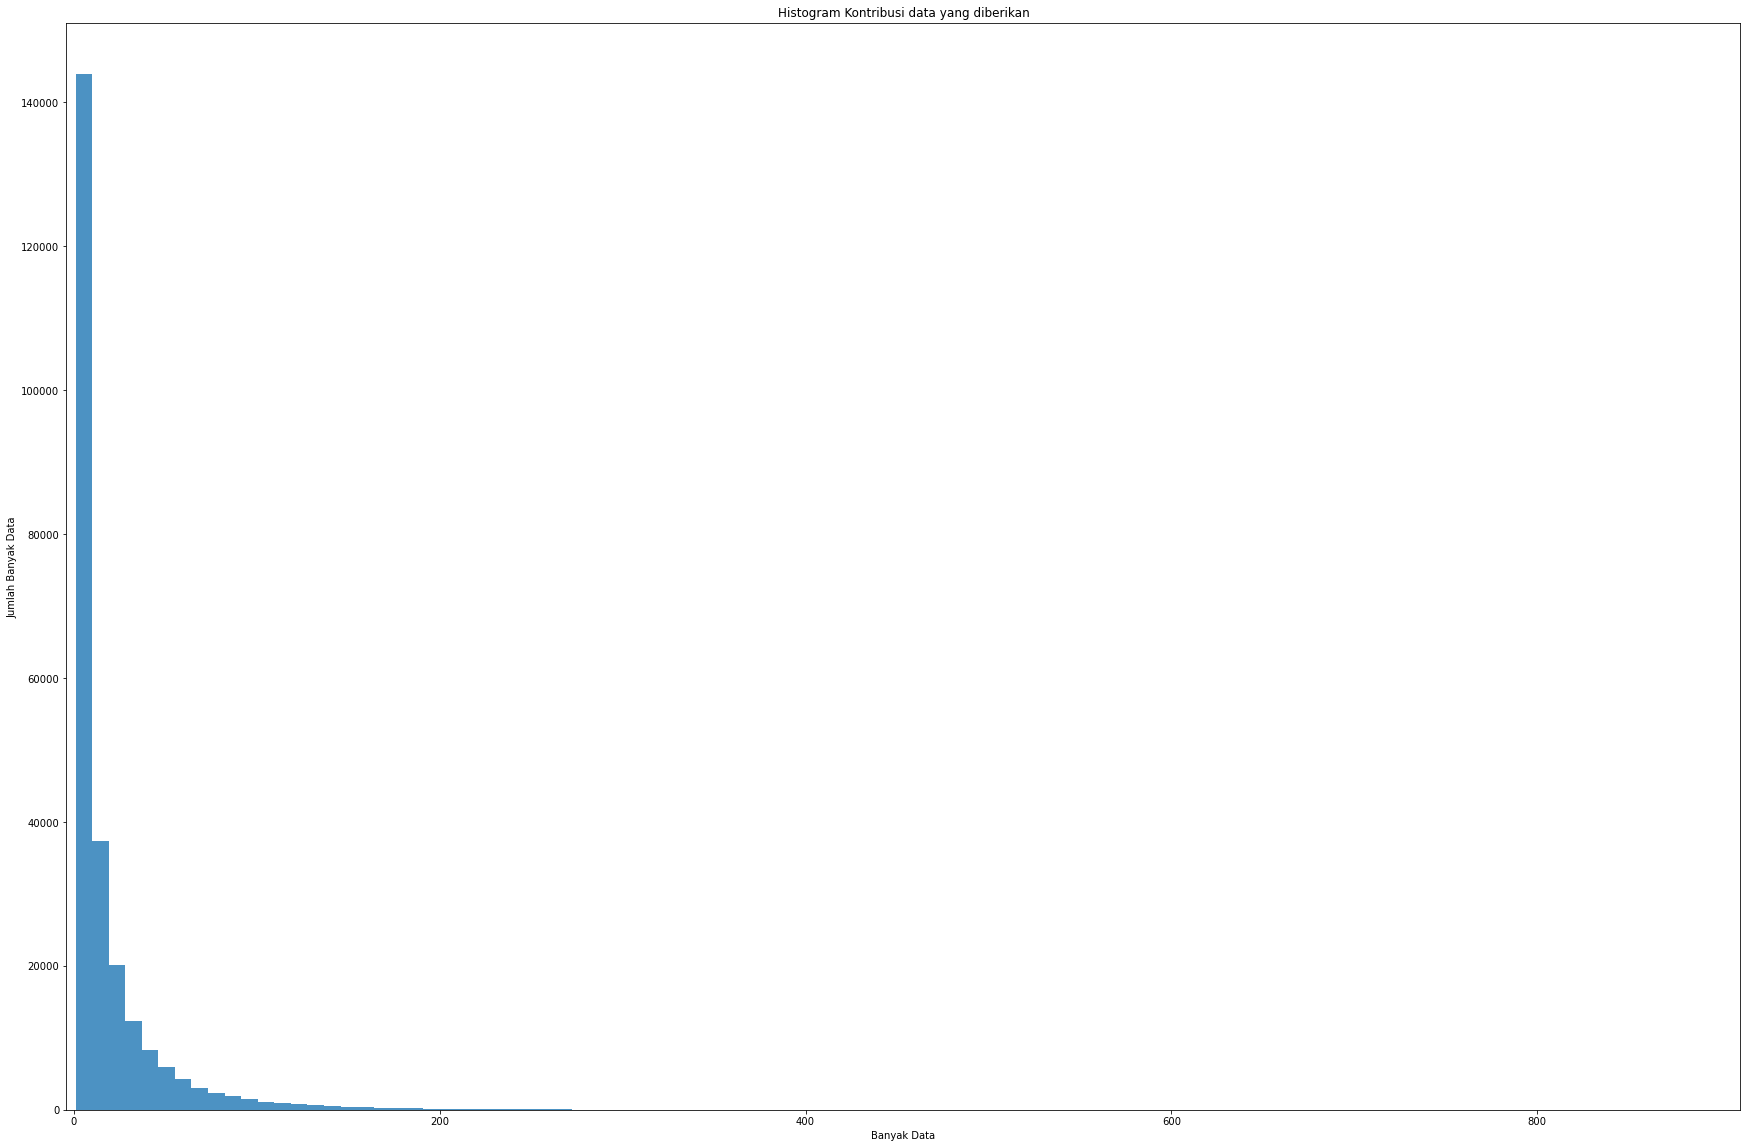

In [9]:
# Dari data diatas, kemudian dibuat menjadi Hystogram
data = listCountUser

# fixed bin size
fig, ax = plt.subplots(figsize=(30,20))

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=100, alpha=0.8)
plt.title('Histogram Kontribusi data yang diberikan')
plt.xlabel('Banyak Data')
plt.ylabel('Jumlah Banyak Data')

plt.show()

In [10]:
# Modul membantu proses statistik
import statistics

# Meannya 18.81
print(sum(listCountUser) / len(listCountUser))

# Standar Deviasi nya 30.65
print(statistics.stdev(listCountUser))

# Dari grafik hystogram dan Standart Deviasi diketahui persebaran data bernilai 30 dengan mean 18.81
# Artinya lokasi data terbanyak ada disekitar area tersebut (18.81)
# Pada proses ini dipilih range nilai 25-100 untuk dijadikan data latih
# Jika data record rating ke movie yang dilatihkan hanya berjumlah 5-20 per user, maka terlalu sedikit
# Oleh karena itu, dengan bantuan Hystogram dipilih 25-100 untuk jadi data latih karena cukup banyak jumlah datanya
# dan dirasa konstribusi data tersebut paling banyak dan dinilai cukup balance

18.811800408945068
30.65274266586585


In [15]:
# Dapatin data lengkap dari 44858 user yang sudah diseleksi dari sebelumnya 247000an
listUserDF_Sedang=listUserDF.loc[(listUserDF['counts']>25) & (listUserDF['counts']<100)]
listUserDF_Sedang.shape

# Kelompok Sedang

(44858, 2)

In [18]:
# Disini kita sudah mengambil data dengan range tengah", tetapi range yang sangat tinggi atau rendah tidak terambil
# Maka dari itu, range tinggi dan rendah juga akan dipakai.
listUserDF_Tinggi=listUserDF.loc[listUserDF['counts']>100]
listUserDF_Tinggi.shape

# Kelompok Tinggi

(6687, 2)

In [17]:
# Ternyata data cenderung berkumpul di kelompok rendah
listUserDF_Rendah=listUserDF.loc[listUserDF['counts']<25]
listUserDF_Rendah.shape

# Kelompok Rendah

(193682, 2)

In [16]:
listUserDF_Sedang.head()

,userId,counts
11,12,52
14,15,26
31,34,41
34,37,27
39,43,46


In [19]:
listUser_Sedang = listUserDF_Sedang['userId'].values.tolist()
listCountUser_Sedang = listUserDF_Sedang['counts'].values.tolist()

In [20]:
#  Tidak dijalankan karena terlalu berat
# plt.style.use('_mpl-gallery')

# x = listUser
# y = listCountUser

# # plot
# fig, ax = plt.subplots(figsize=(30,20))

# ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

# ax.set(xlim=(0, 8), xticks=np.arange(1, len(x)),
#        ylim=(0, 8), yticks=np.arange(1, max(y)))

# plt.show()

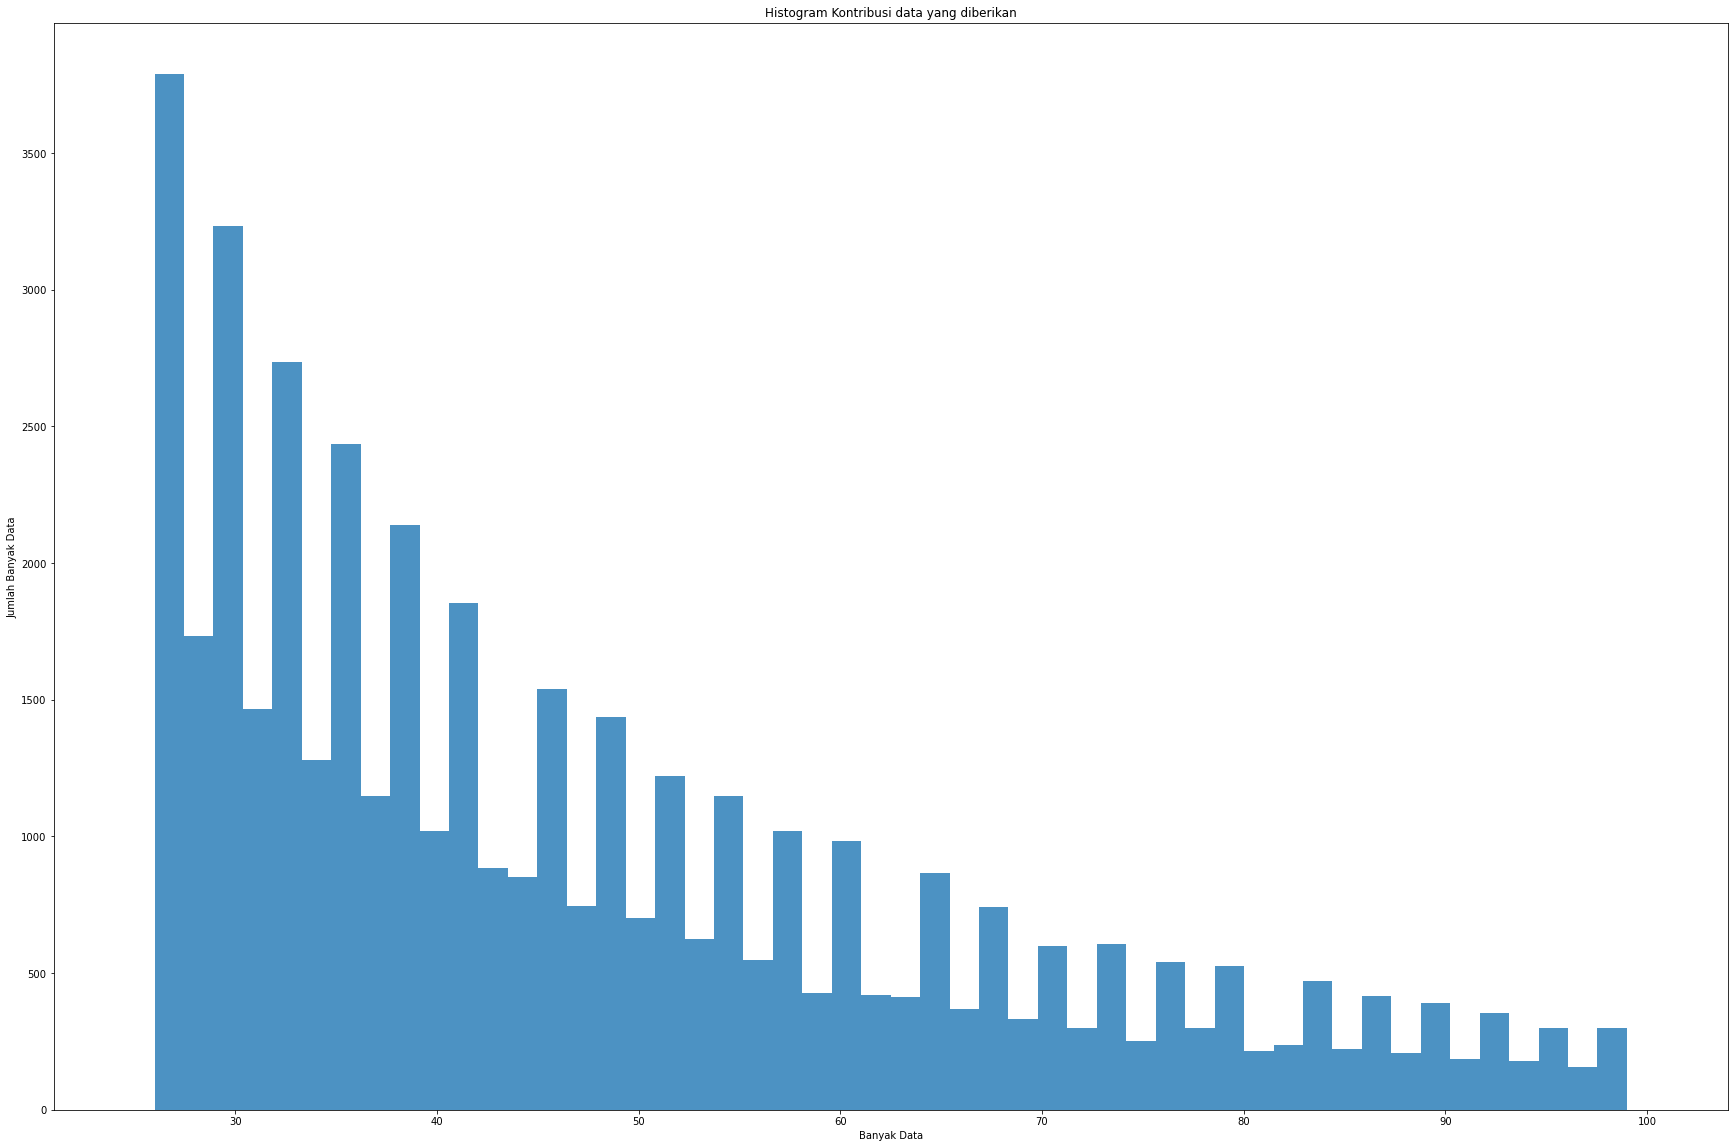

In [21]:
# Dari data diatas, kemudian dibuat menjadi Hystogram
data = listCountUser_Sedang

# fixed bin size
fig, ax = plt.subplots(figsize=(30,20))

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=50, alpha=0.8)
plt.title('Histogram Kontribusi data yang diberikan')
plt.xlabel('Banyak Data')
plt.ylabel('Jumlah Banyak Data')

plt.show()

In [22]:
# Modul membantu proses statistik
import statistics

# Meannya 47.51
# Nilai mean naik dari 18,5 menjadi 47.51
print(sum(listCountUser_Sedang) / len(listCountUser_Sedang))

# Standar Deviasi turun dari 30.65 menjadi 18.71
# STDV yang mendekati 0 , menunjukan variasi data yang tersebat akan semakin kecil
# Dengan menurunnya nilai STDV, maka persebaran data sudah lebih balance 
# dan range jumlah record ratings per user sudah naik menjadi sekitar 30 - 60
print(statistics.stdev(listCountUser_Sedang))

47.51790093182933
18.710642682079914


In [17]:
# Memang masih terdapat data yang perbedaan jumlahnya masih cukup besar, tapi lebih baik dibanding sebelumnya

In [23]:
listUser_Rendah = listUserDF_Rendah['userId'].values.tolist()
listCountUser_Rendah = listUserDF_Rendah['counts'].values.tolist()

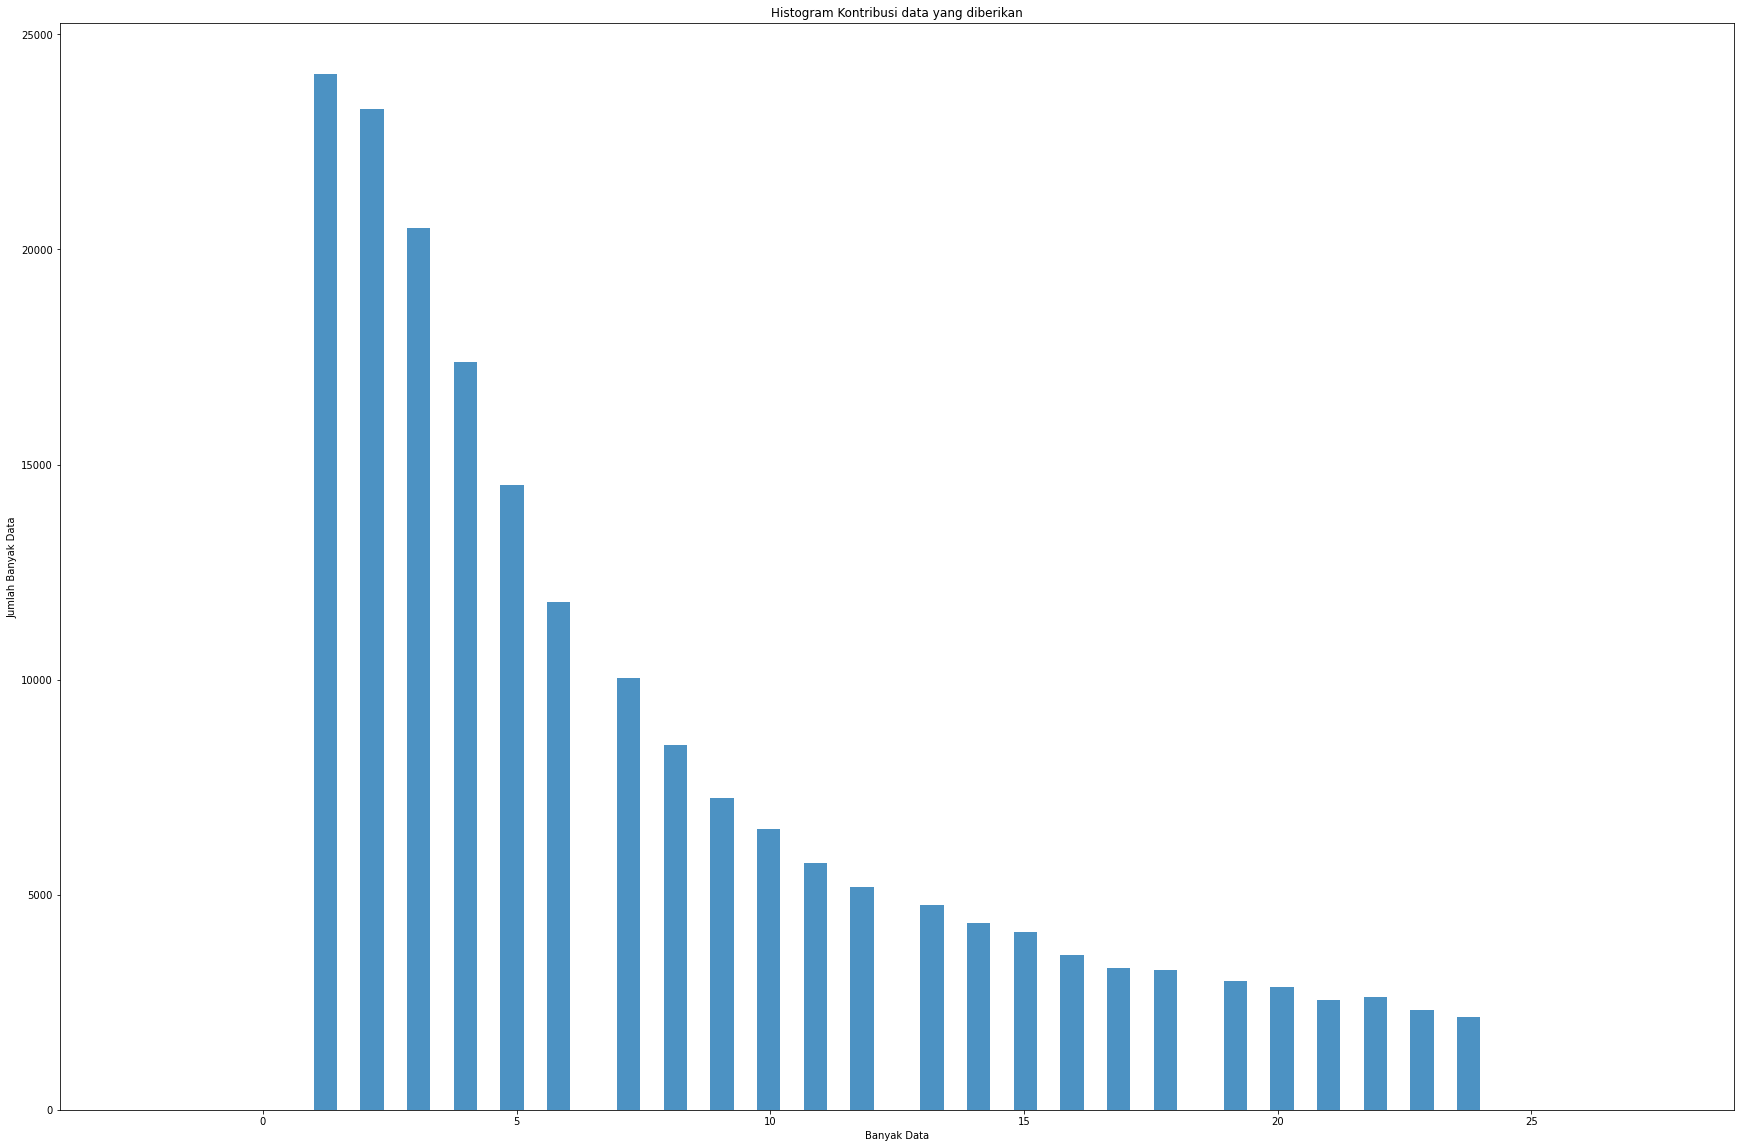

In [24]:
# Dari data diatas, kemudian dibuat menjadi Hystogram
data = listCountUser_Rendah

# fixed bin size
fig, ax = plt.subplots(figsize=(30,20))

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=50, alpha=0.8)
plt.title('Histogram Kontribusi data yang diberikan')
plt.xlabel('Banyak Data')
plt.ylabel('Jumlah Banyak Data')

plt.show()

In [25]:
# Meannya 7.36
print(sum(listCountUser_Rendah) / len(listCountUser_Rendah))

# Standar Deviasi nya 6
print(statistics.stdev(listCountUser_Rendah))

# Dari bentuk Hystogram dan nilai STDV, menurut kami sudah cukup baik untuk dipakai

7.363317190033147
6.086677310928878


In [27]:
listUser_Tinggi = listUserDF_Tinggi['userId'].values.tolist()
listCountUser_Tinggi = listUserDF_Tinggi['counts'].values.tolist()

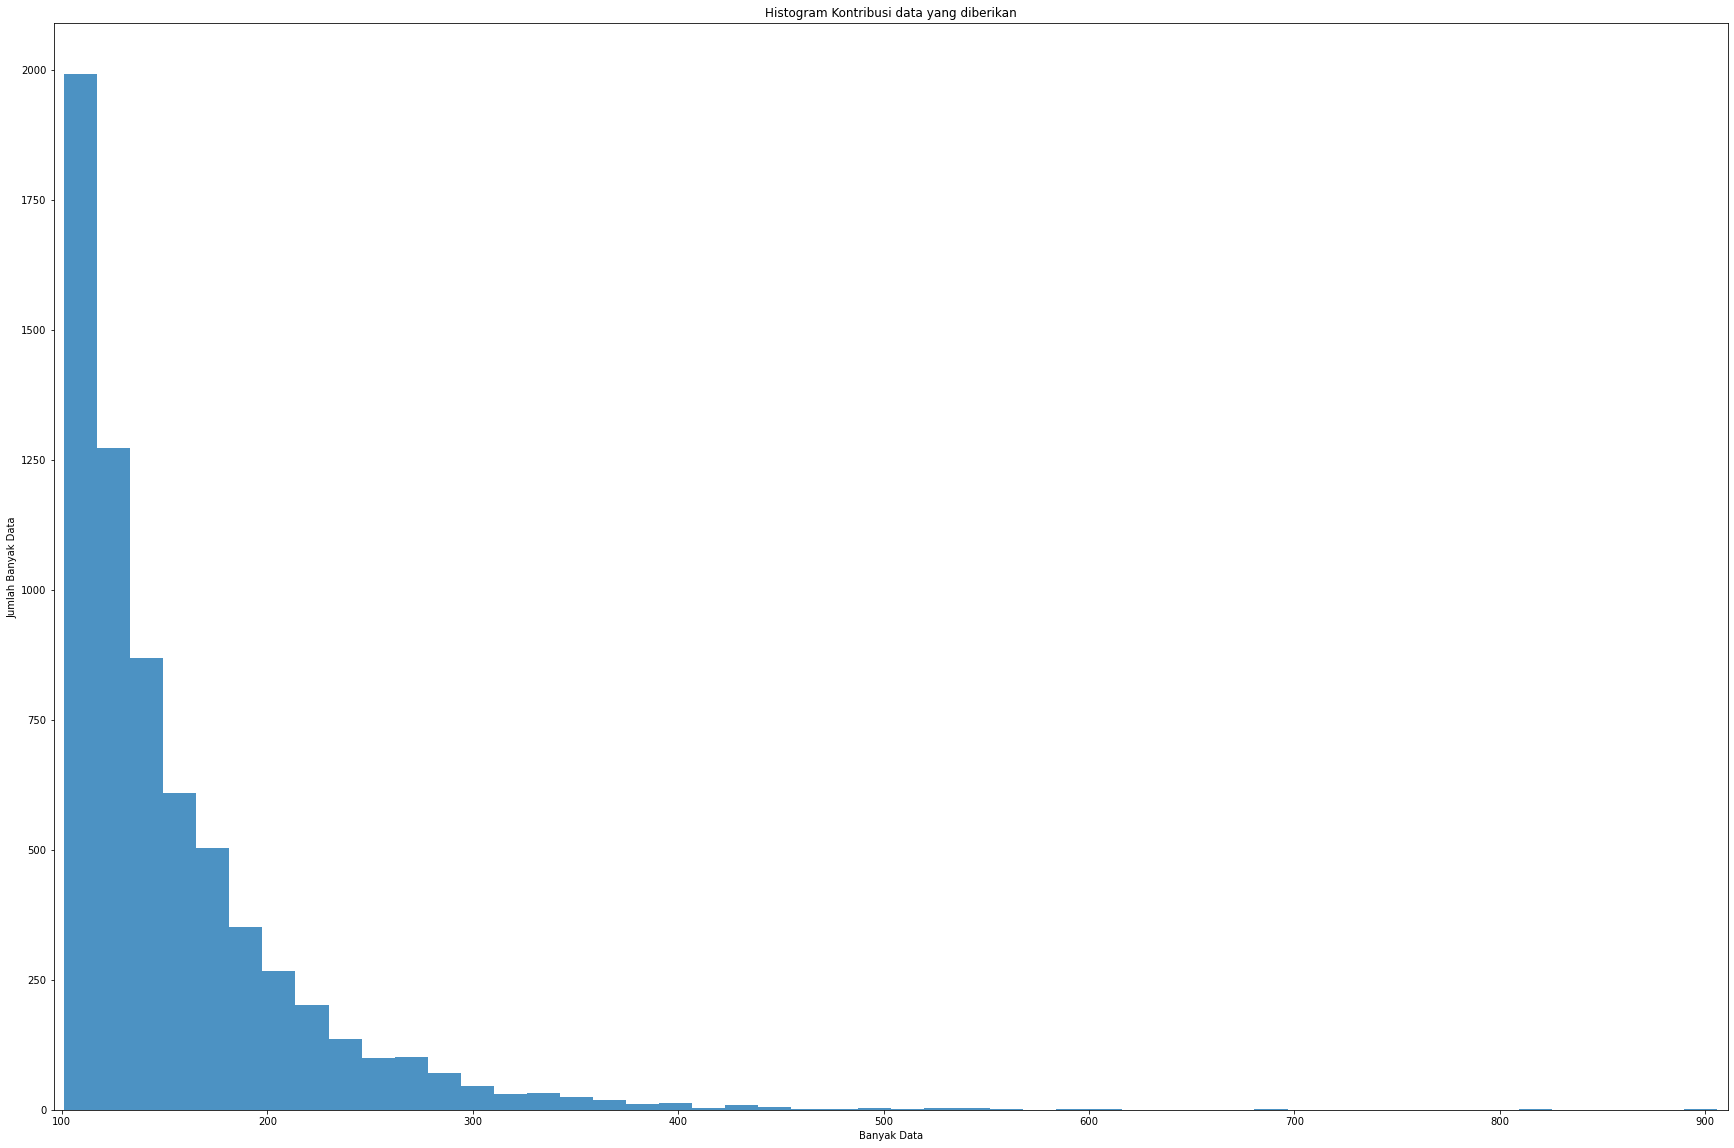

In [28]:
# Dari data diatas, kemudian dibuat menjadi Hystogram
data = listCountUser_Tinggi

# fixed bin size
fig, ax = plt.subplots(figsize=(30,20))

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=50, alpha=0.8)
plt.title('Histogram Kontribusi data yang diberikan')
plt.xlabel('Banyak Data')
plt.ylabel('Jumlah Banyak Data')

plt.show()

In [33]:
# Meannya 154.08
print(sum(listCountUser_Tinggi) / len(listCountUser_Tinggi))

# Standar Deviasi nya 59.73
print(statistics.stdev(listCountUser_Tinggi))

# Dari bentuk Hystogram dan nilai STDV, menurut kami sudah cukup baik untuk dipakai karena meannya cukup tinggi
# artinya jumlah datanya tidak ada yang terlalu sedikit, meskipun STDV nya masih besar.

154.0834454912517
59.73312799886549


# Dari listUser yang sudah didapat, mergeJoin lagi dengan data Movie

Supaya data movie bisa didapat kembali.

### Kelompok Sedang

In [32]:
# Dari data user yang tersisa 44858, akan dicari movie apa saja yang di rate oleh mereka
df3_Filter_User_Sedang = listUserDF_Sedang.merge(df3,left_on='userId', right_on='userId')

In [35]:
# Dari 44858 user, ternyata terdapat data record sebanyak 2131558
# Tapi data sebanyak 2131558 tersebut terdapat movie yang datanya duplikasi
# Karena 1 user dapat merate lebih dari 1 film dan 1 film bisa dirate lebih dari 1 user
df3_Filter_User_Sedang.shape

(2131558, 29)

In [42]:
df3_Filter_User_Sedang[df3_Filter_User_Sedang['userId']==12].head(5)

,userId,counts,movieId,rating,timestamp,budget,genres,homepage,id,keywords,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,12,52,1246,5.0,943912834,24000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.rocky.com/,1246,"[{""id"": 276, ""name"": ""philadelphia""}, {""id"": 3...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,It ain't over 'til it's over.,Rocky Balboa,6.5,835,1246,Rocky Balboa,"[{""cast_id"": 24, ""character"": ""Rocky Balboa"", ...","[{""credit_id"": ""52fe42e9c3a36847f802c5f9"", ""de..."
1,12,52,223,5.0,943912206,1288000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",NaN,223,"[{""id"": 660, ""name"": ""monte carlo""}, {""id"": 81...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The shadow of this woman darkened their love.,Rebecca,7.7,336,223,Rebecca,"[{""cast_id"": 10, ""character"": ""'Maxim' de Wint...","[{""credit_id"": ""56520a6d9251414af900b1b8"", ""de..."
2,12,52,2355,4.0,943912871,20000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.sonypictures.com/movies/reignoverme...,2355,"[{""id"": 2246, ""name"": ""confidence""}, {""id"": 27...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Let in the unexpected.,Reign Over Me,7.1,334,2355,Reign Over Me,"[{""cast_id"": 15, ""character"": ""Charlie Fineman...","[{""credit_id"": ""562eb58bc3a3681b5c00b9e6"", ""de..."
3,12,52,157,1.0,943910494,18000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,157,[],...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,A dying planet. A fight for life.,Star Trek III: The Search for Spock,6.4,434,157,Star Trek III: The Search for Spock,"[{""cast_id"": 5, ""character"": ""Admiral James T....","[{""credit_id"": ""52fe4220c3a36847f8005eb3"", ""de..."
4,12,52,296,5.0,943911078,200000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",NaN,296,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Machines Will Rise.,Terminator 3: Rise of the Machines,5.9,2143,296,Terminator 3: Rise of the Machines,"[{""cast_id"": 6, ""character"": ""The Terminator"",...","[{""credit_id"": ""52fe4234c3a36847f800bcef"", ""de..."


### Kelompok Tinggi

In [37]:
# Dari data user yang tersisa 6687, akan dicari movie apa saja yang di rate oleh mereka
df3_Filter_User_Tinggi = listUserDF_Tinggi.merge(df3,left_on='userId', right_on='userId')

In [38]:
# Dari 6687 user, ternyata terdapat data record sebanyak 1030356
# Tapi data sebanyak 1030356 tersebut terdapat movie yang datanya duplikasi
# Karena 1 user dapat merate lebih dari 1 film dan 1 film bisa dirate lebih dari 1 user
df3_Filter_User_Tinggi.shape

(1030356, 29)

In [41]:
df3_Filter_User_Tinggi[df3_Filter_User_Tinggi['userId']==12].head(5)

,userId,counts,movieId,rating,timestamp,budget,genres,homepage,id,keywords,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew


### Kelompok Rendah

In [43]:
# Dari data user yang tersisa 193682, akan dicari movie apa saja yang di rate oleh mereka
df3_Filter_User_Rendah = listUserDF_Rendah.merge(df3,left_on='userId', right_on='userId')

In [44]:
# Dari 193682 user, ternyata terdapat data record sebanyak 1426142
# Tapi data sebanyak 1426142 tersebut terdapat movie yang datanya duplikasi
# Karena 1 user dapat merate lebih dari 1 film dan 1 film bisa dirate lebih dari 1 user
df3_Filter_User_Rendah.shape

(1426142, 29)

In [45]:
df3_Filter_User_Rendah[df3_Filter_User_Rendah['userId']==12].head(5)

,userId,counts,movieId,rating,timestamp,budget,genres,homepage,id,keywords,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew


In [45]:
# # ubah tipe data int dari movie_id jadi str
# df3_Filter_User['movie_id'] = df3_Filter_User['movie_id'].apply(str)

# Balancing Data - movie Id - kelompok sedang

### Kelompok Sedang

In [47]:
# Lakukan Grouping ke movie, ternyata terdapat 1304  Movie , 
# Artinya telah berkurang dari sebelumnya 4803 movie
listMoiveDF_Sedang=df3_Filter_User_Sedang.groupby('movie_id').size().reset_index(name='counts')
listMoiveDF_Sedang

,movie_id,counts
0,5,5620
1,11,10964
2,12,1699
3,13,836
4,14,2626
...,...,...
1299,172533,1
1300,173931,1
1301,174751,1
1302,175291,2


In [48]:
listMovieSedang = listMoiveDF_Sedang['movie_id'].values.tolist()
listCountMovieSedang = listMoiveDF_Sedang['counts'].values.tolist()

In [83]:
# Tidak dijalankan karena terlalu berat

# plt.style.use('_mpl-gallery')

# x = listMovie
# y = listCountMovie

# # plot
# fig, ax = plt.subplots(figsize=(30,15))

# ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

# ax.set(xlim=(0, 8), xticks=np.arange(1, len(x)),
#        ylim=(0, 8), yticks=np.arange(1, max(y)))

# plt.show()

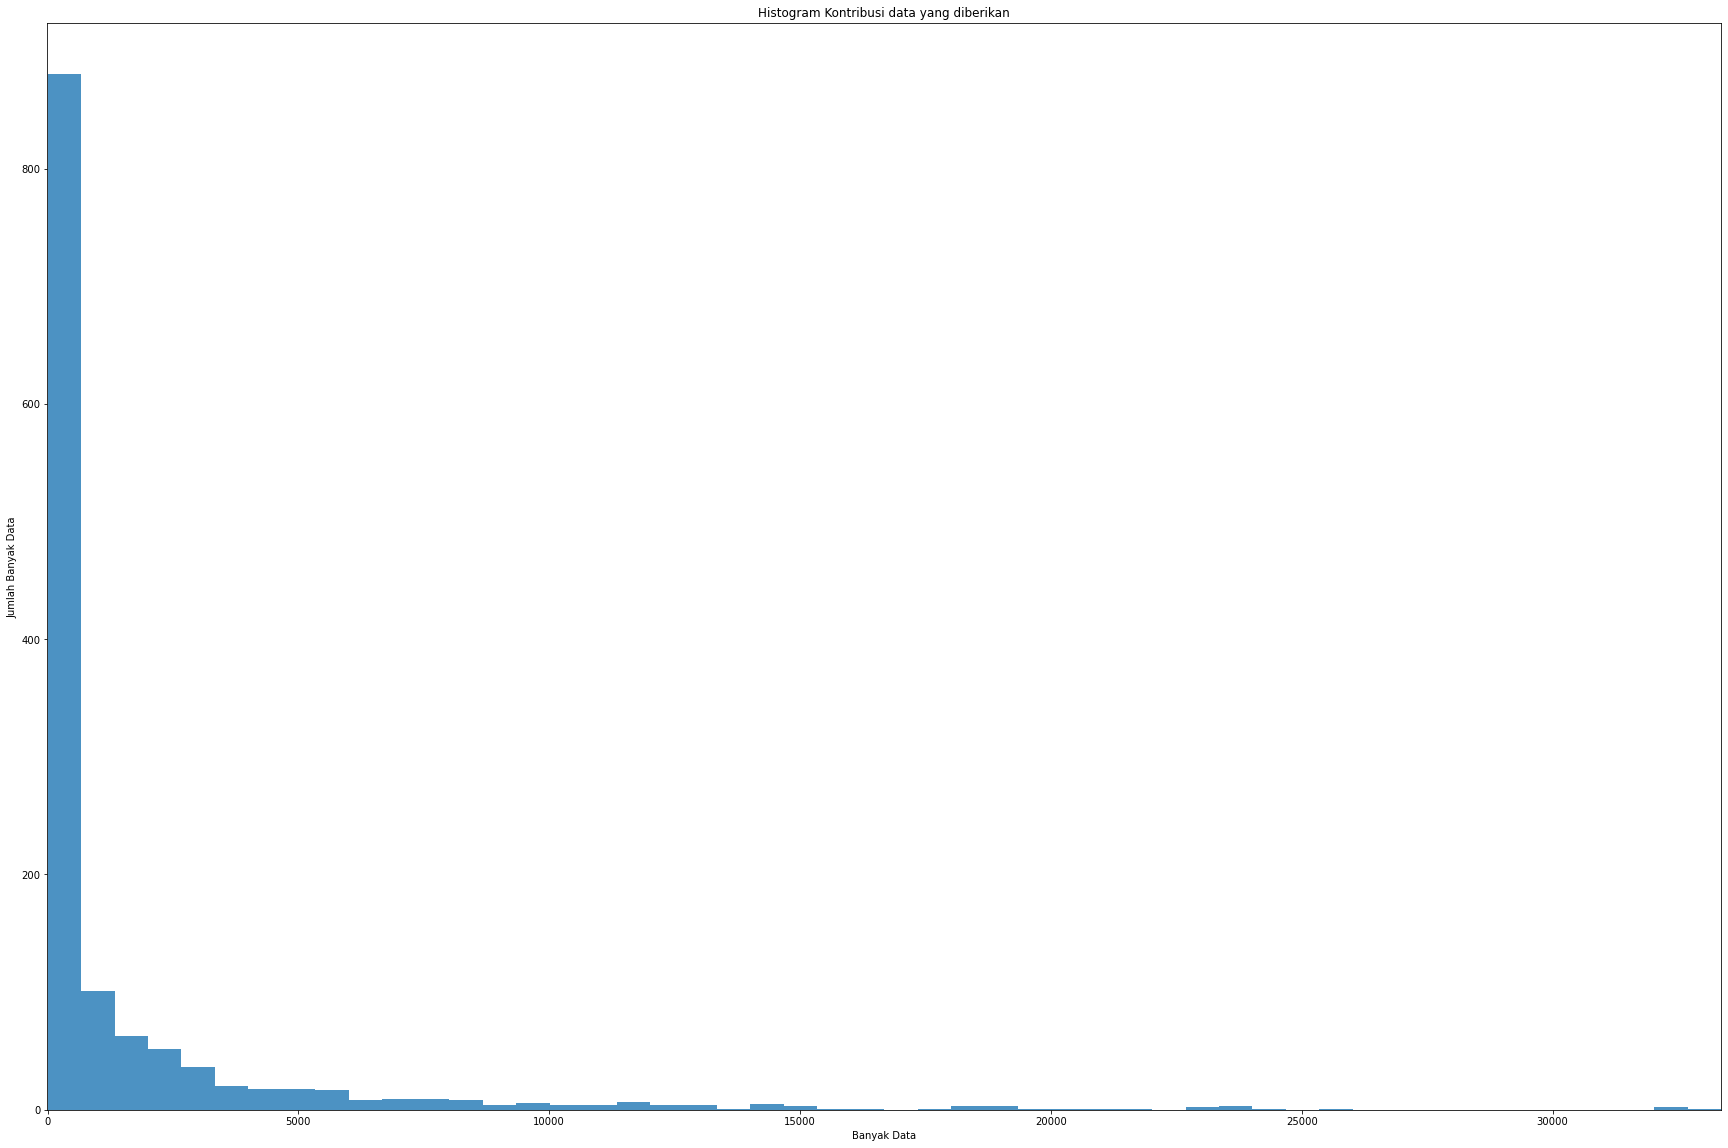

In [49]:
# Dari data diatas, kemudian dibuat menjadi Hystogram
data = listCountMovieSedang

# fixed bin size
fig, ax = plt.subplots(figsize=(30,20))

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=50, alpha=0.8)
plt.title('Histogram Kontribusi data yang diberikan')
plt.xlabel('Banyak Data')
plt.ylabel('Jumlah Banyak Data')

plt.show()

In [50]:
# Meannya 1635
print(sum(listCountMovieSedang) / len(listCountMovieSedang))

# Standar Deviasi nya 3788
print(statistics.stdev(listCountMovieSedang))

# Dari grafik hystogram dipilih range nilai 750-6000 untuk dijadikan data latih
# Karena konstribusi data tersebut paling banyak dan dinilai cukup balance

1634.6303680981596
3788.783864181728


In [71]:
# Dari hystogram diatas, diketahui bahwa terdapat Movie_id 309, cukup balance jumlah data yang dimiliki
listMoiveDF_Sedang_Final = listMoiveDF_Sedang.loc[(listMoiveDF_Sedang['counts']>750) & (listMoiveDF_Sedang['counts']<6000)]
listMoiveDF_Sedang_Final.shape

(309, 2)

In [57]:
listMovieSedangFinal = listMoiveDF_Sedang_Final['movie_id'].values.tolist()
listCountMovieSedangFinal = listMoiveDF_Sedang_Final['counts'].values.tolist()

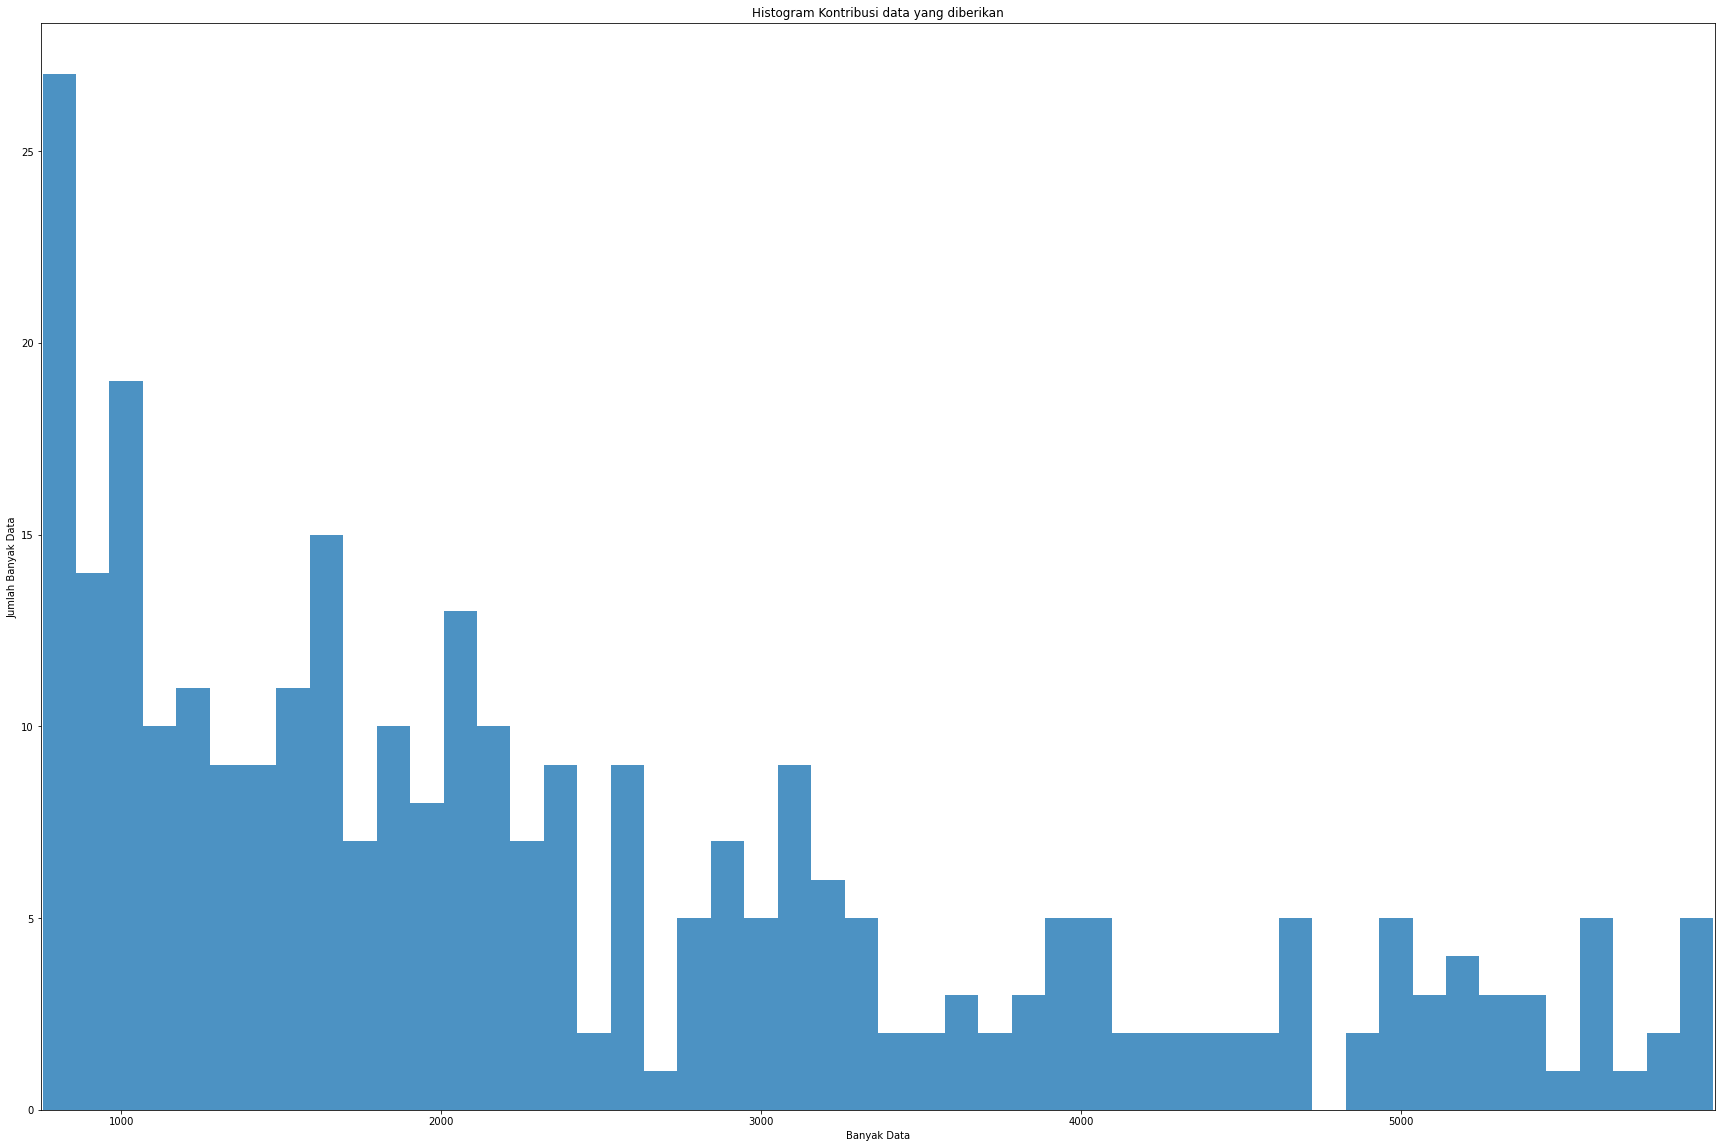

In [58]:
data = listCountMovieSedangFinal

fig, ax = plt.subplots(figsize=(30,20))

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=50, alpha=0.8)
plt.title('Histogram Kontribusi data yang diberikan')
plt.xlabel('Banyak Data')
plt.ylabel('Jumlah Banyak Data')

plt.show()

In [61]:
# Meannya 2441.517
print(sum(listCountMovieSedangFinal) / len(listCountMovieSedangFinal))

# Standar Deviasi nya turun dari 3788 menjadi 1449
print(statistics.stdev(listCountMovieSedangFinal))

# Diketahui nilai STDV sudah turun lebih dari 1/2 kali. Artinya persebaran data sudah lebih teratur dan nilai meannya adalah
# 2441, dimana persebaran di range sekitar nilai tersebut dinilai sudah lebih baik.

2441.517799352751
1448.9425310501624


### Kelompok Tinggi

In [62]:
# Lakukan Grouping ke movie, ternyata terdapat 1334  Movie , 
# Artinya telah berkurang dari sebelumnya 4803 movie
listMoiveDF_Tinggi=df3_Filter_User_Tinggi.groupby('movie_id').size().reset_index(name='counts')
listMoiveDF_Tinggi

,movie_id,counts
0,5,2297
1,11,3529
2,12,1142
3,13,515
4,14,1230
...,...,...
1329,162396,14
1330,168530,1
1331,171759,14
1332,172533,1


In [63]:
listMovieTinggi = listMoiveDF_Tinggi['movie_id'].values.tolist()
listCountMovieTinggi = listMoiveDF_Tinggi['counts'].values.tolist()

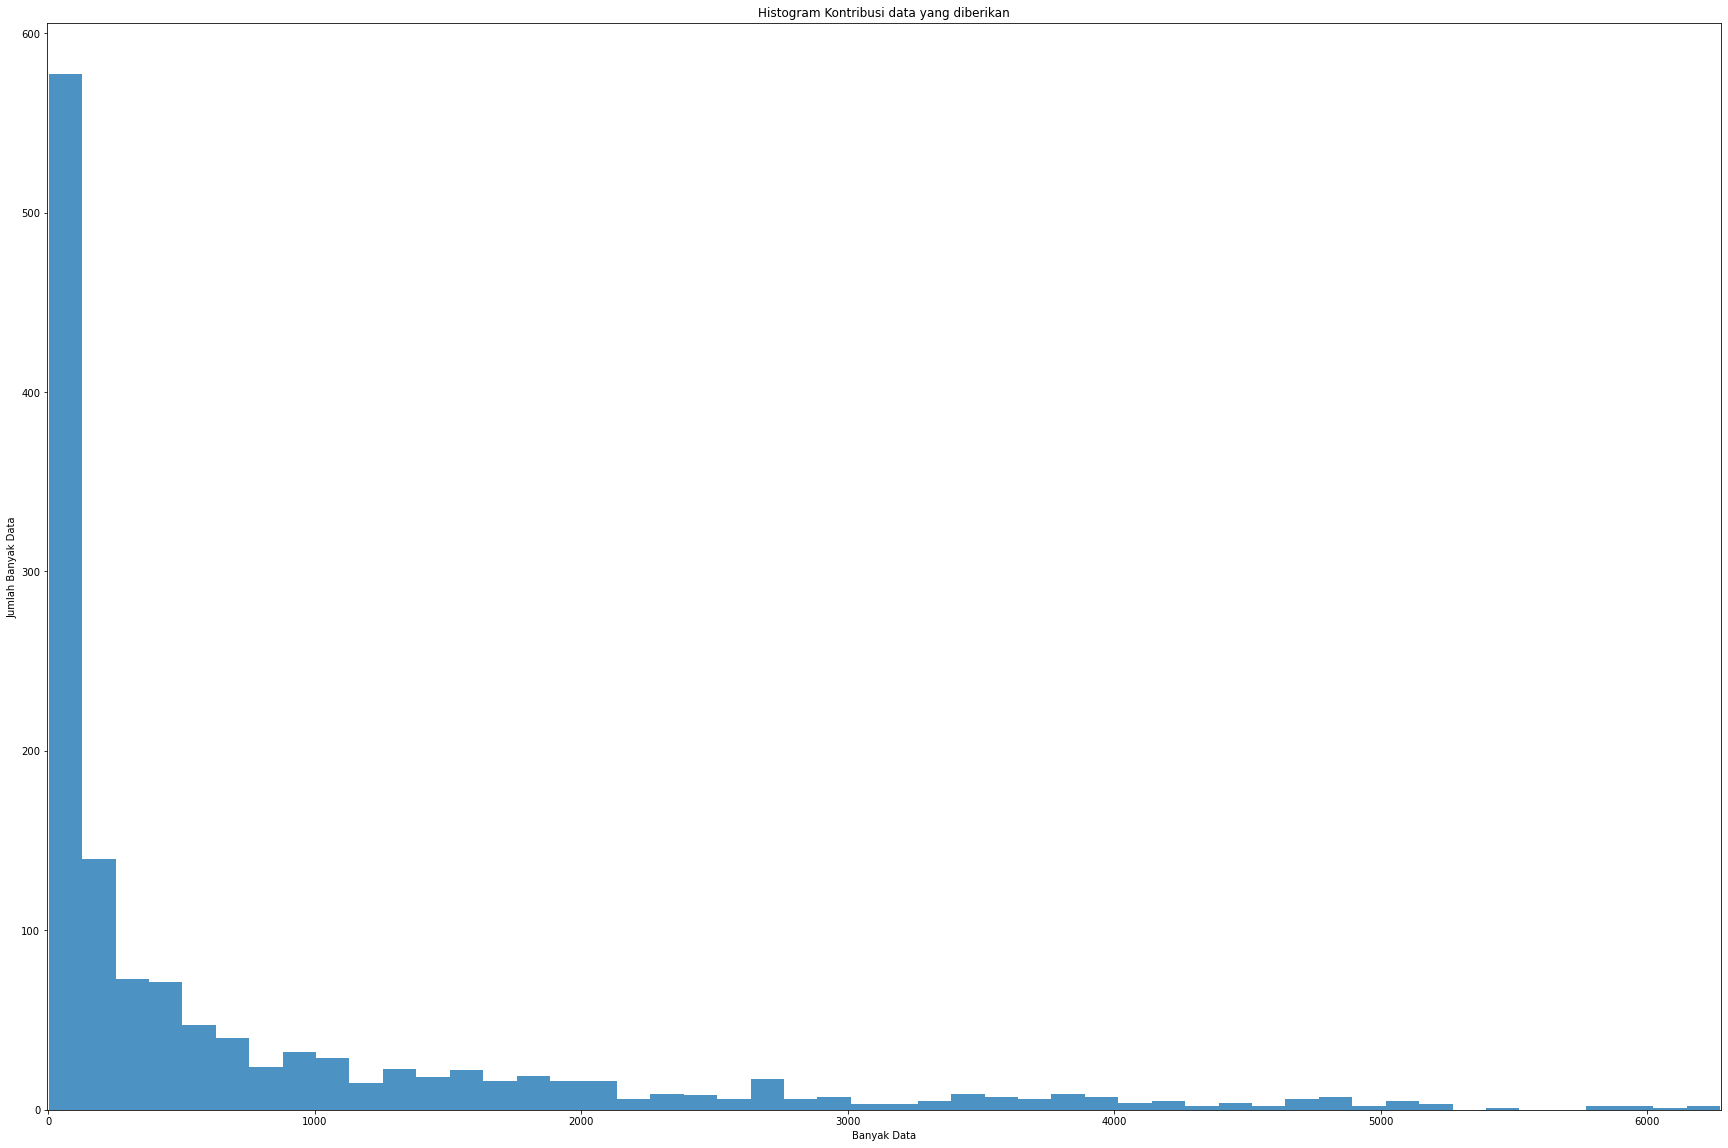

In [64]:
# Dari data diatas, kemudian dibuat menjadi Hystogram
data = listCountMovieTinggi

# fixed bin size
fig, ax = plt.subplots(figsize=(30,20))

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=50, alpha=0.8)
plt.title('Histogram Kontribusi data yang diberikan')
plt.xlabel('Banyak Data')
plt.ylabel('Jumlah Banyak Data')

plt.show()

In [66]:
# Meannya 772
print(sum(listCountMovieTinggi) / len(listCountMovieTinggi))

# Standar Deviasi nya 1197
print(statistics.stdev(listCountMovieTinggi))

# Pada STDV dan Hystogram tersebut sebetulnya diketahui data ini kurang baik. Karena tidak stabil
# Maka akan dilakukan balancing, dengan nilai disekitar 500 - 1200 karena persebaran berada di area tersebut
# dan data sebanyak 500 - 1200 sudah diraca cukup banyak

772.3808095952024
1197.7557403807123


In [78]:
# Dari hystogram diatas, diketahui bahwa terdapat Movie_id 309, cukup balance jumlah data yang dimiliki
listMoiveDF_Tinggi_Final = listMoiveDF_Tinggi.loc[(listMoiveDF_Tinggi['counts']>500) & (listMoiveDF_Tinggi['counts']<1200)]
listMoiveDF_Tinggi_Final.shape

(180, 2)

In [79]:
listMovieTinggiFinal = listMoiveDF_Tinggi_Final['movie_id'].values.tolist()
listCountMovieTinggiFinal = listMoiveDF_Tinggi_Final['counts'].values.tolist()

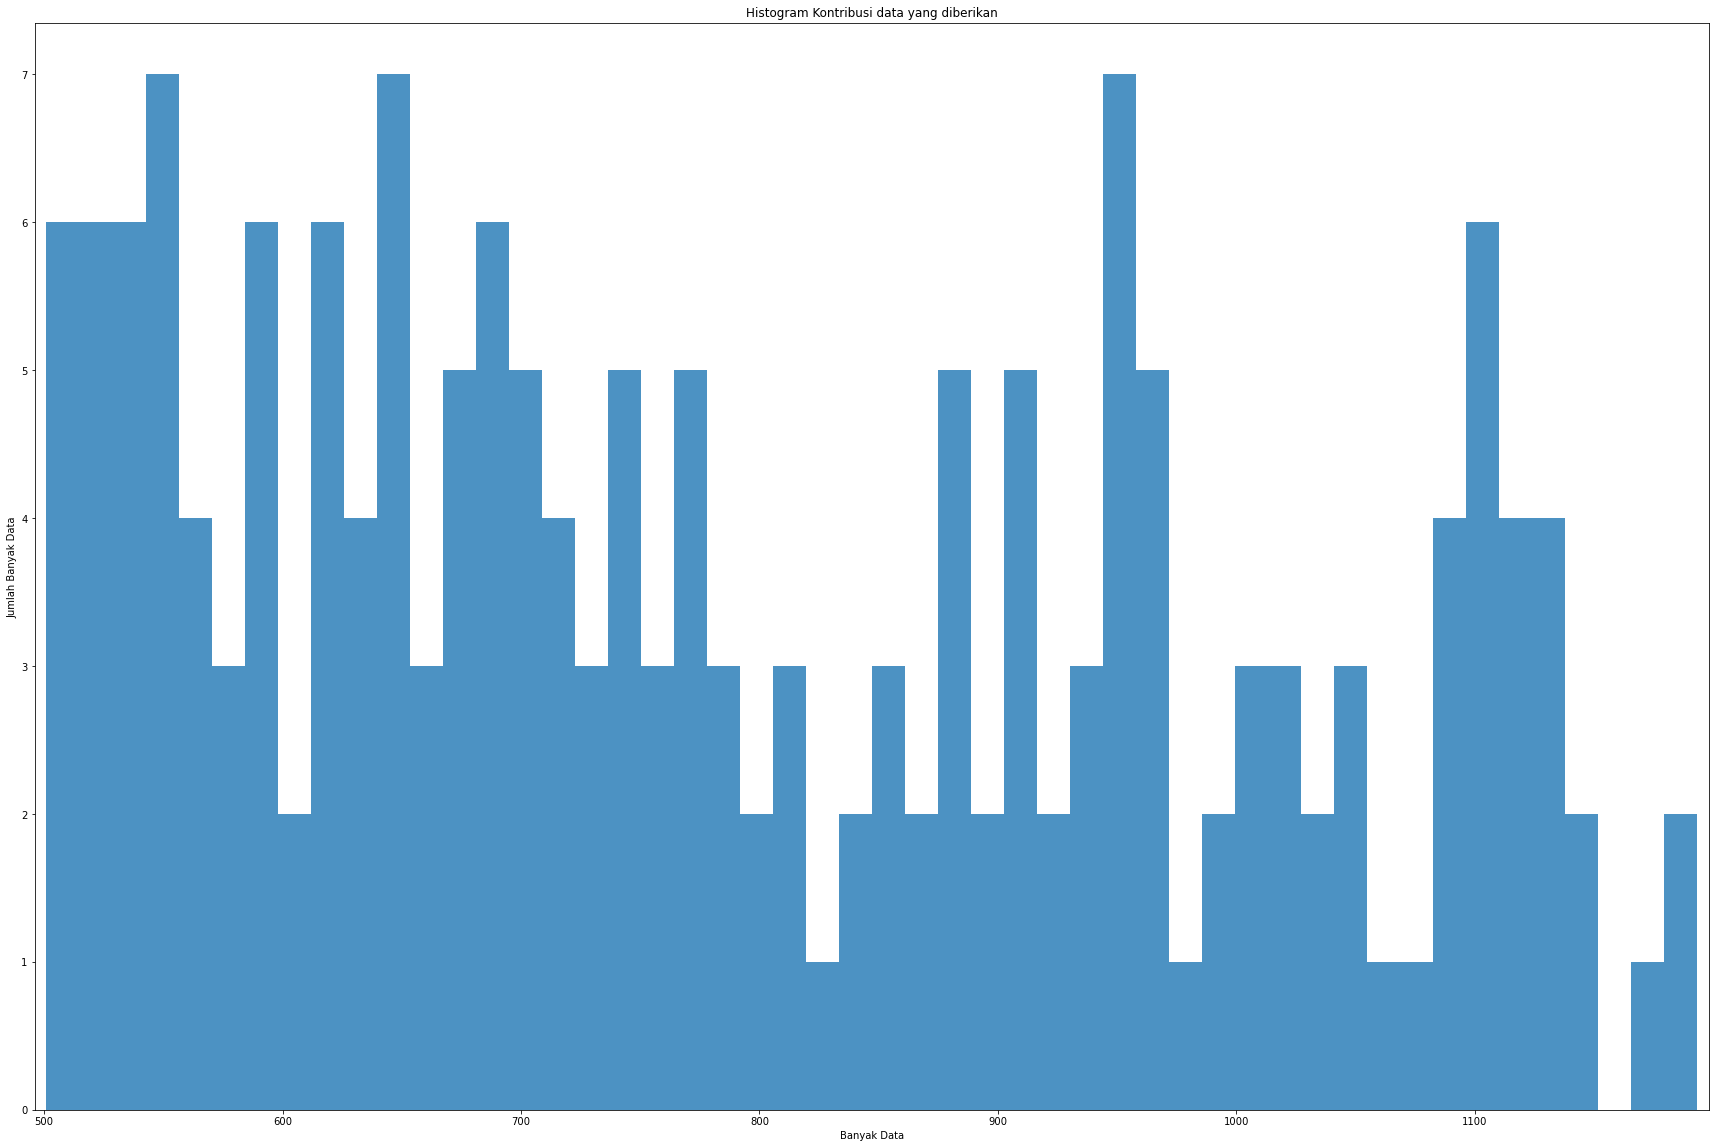

In [80]:
# Dari data diatas, kemudian dibuat menjadi Hystogram
data = listCountMovieTinggiFinal

# fixed bin size
fig, ax = plt.subplots(figsize=(30,20))

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=50, alpha=0.8)
plt.title('Histogram Kontribusi data yang diberikan')
plt.xlabel('Banyak Data')
plt.ylabel('Jumlah Banyak Data')

plt.show()

In [82]:
# Meannya 772 menjadi 793
print(sum(listCountMovieTinggiFinal) / len(listCountMovieTinggiFinal))

# Standar Deviasi nya dari 1197 turun menjadi 199
print(statistics.stdev(listCountMovieTinggiFinal))

# Dari Hystogram dan STDV , meunjukan ini sudah lebih rata persebaran datanya
# Bahkan STDV turun hampir 10 kali lebih kecil dan meannya masih tidak terlalu berubah

793.7722222222222
199.1723890625067


### Kelompok Rendah

In [84]:
# Lakukan Grouping ke movie, ternyata terdapat 1257   Movie , 
# Artinya telah berkurang dari sebelumnya 4803 movie
listMoiveDF_Rendah=df3_Filter_User_Rendah.groupby('movie_id').size().reset_index(name='counts')
listMoiveDF_Rendah

,movie_id,counts
0,5,7162
1,11,4623
2,12,1576
3,13,461
4,14,2853
...,...,...
1252,168530,2
1253,171759,12
1254,172391,1
1255,172533,1


In [93]:
listMovieRendah = listMoiveDF_Rendah['movie_id'].values.tolist()
listCountMovieRendah = listMoiveDF_Rendah['counts'].values.tolist()

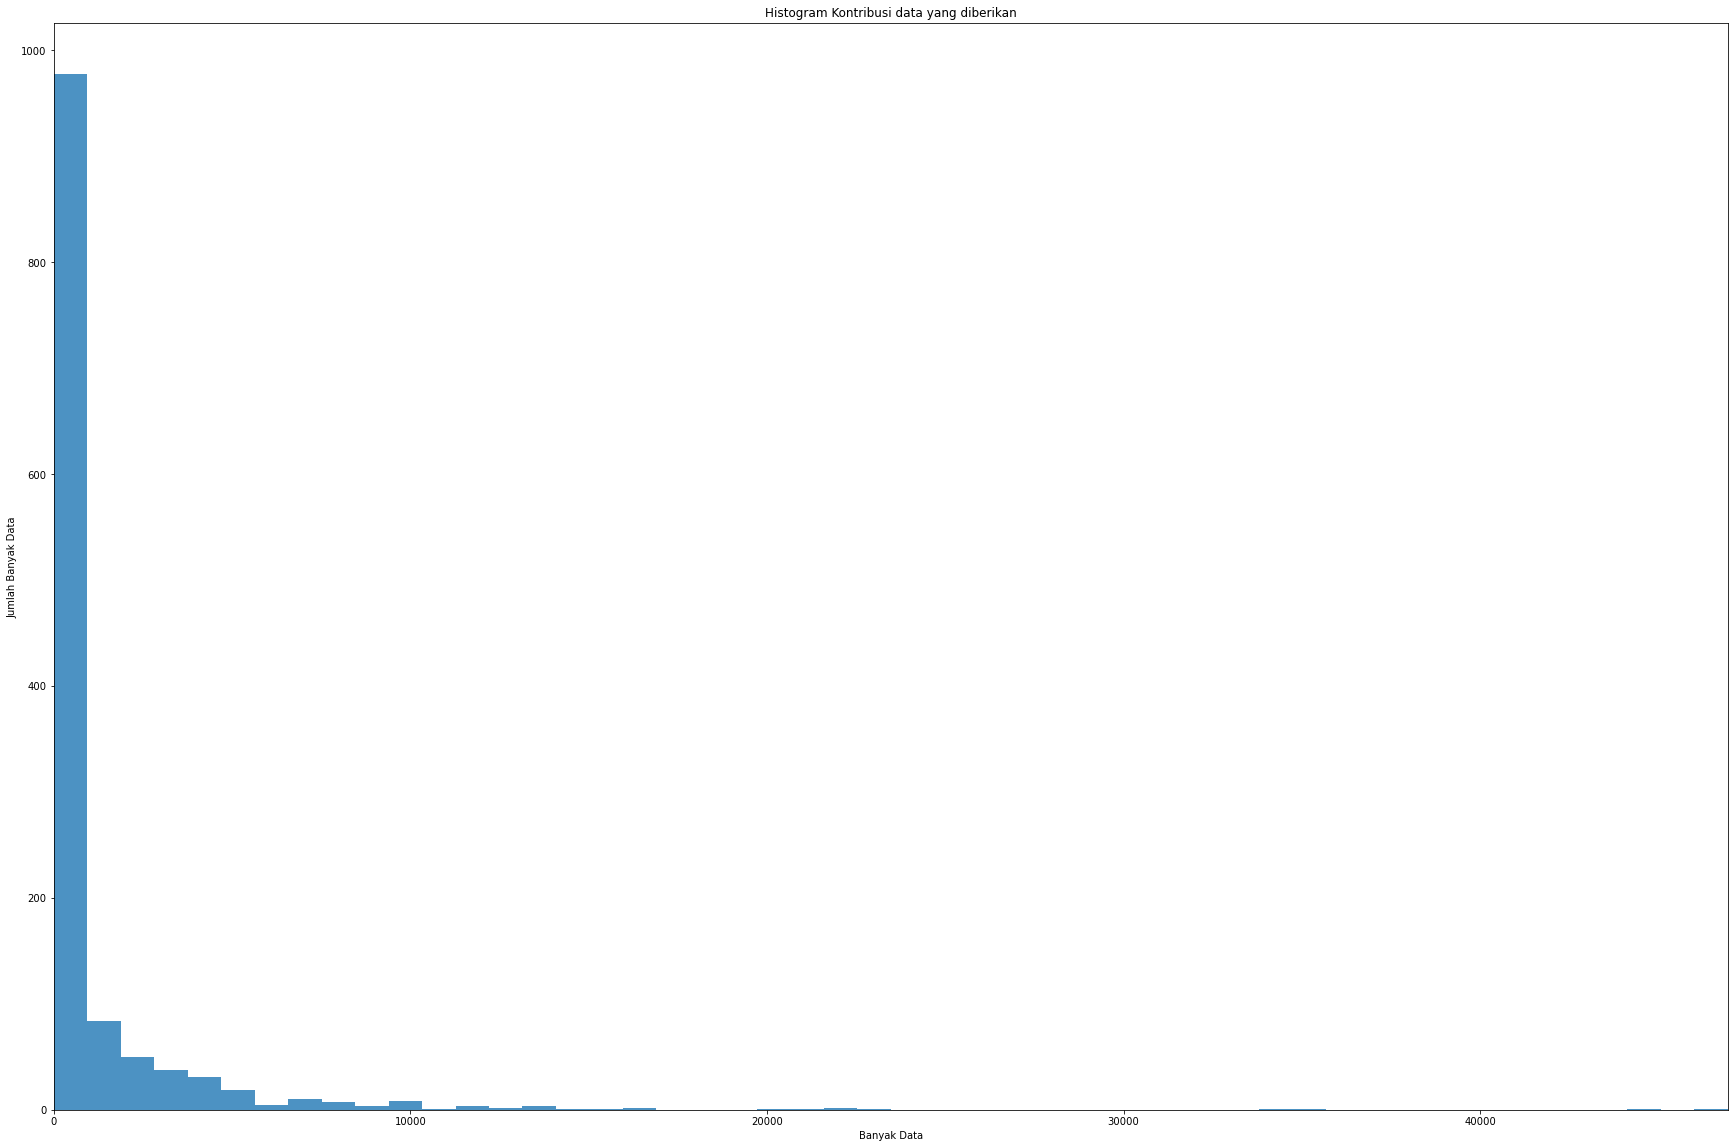

In [94]:
# Dari data diatas, kemudian dibuat menjadi Hystogram
data = listCountMovieRendah

# fixed bin size
fig, ax = plt.subplots(figsize=(30,20))

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=50, alpha=0.8)
plt.title('Histogram Kontribusi data yang diberikan')
plt.xlabel('Banyak Data')
plt.ylabel('Jumlah Banyak Data')

plt.show()

In [87]:
# Meannya 1134
print(sum(listCountMovieRendah) / len(listCountMovieRendah))

# Standar Deviasi nya 3352
print(statistics.stdev(listCountMovieRendah))

# Pada STDV dan Hystogram tersebut sebetulnya diketahui data ini kurang baik. Karena tidak stabil
# Maka akan dilakukan balancing, dengan nilai disekitar 500 - 1200 karena persebaran berada di area tersebut
# dan data sebanyak 500 - 1200 sudah diraca cukup banyak

1134.5600636435959
3352.0585579918447


In [88]:
listMoiveDF_Rendah_Final = listMoiveDF_Rendah.loc[(listMoiveDF_Rendah['counts']>100) & (listMoiveDF_Rendah['counts']<500)]
listMoiveDF_Rendah_Final.shape

(244, 2)

In [91]:
listMovieRendahFinal = listMoiveDF_Rendah_Final['movie_id'].values.tolist()
listCountMovieRendahFinal = listMoiveDF_Rendah_Final['counts'].values.tolist()

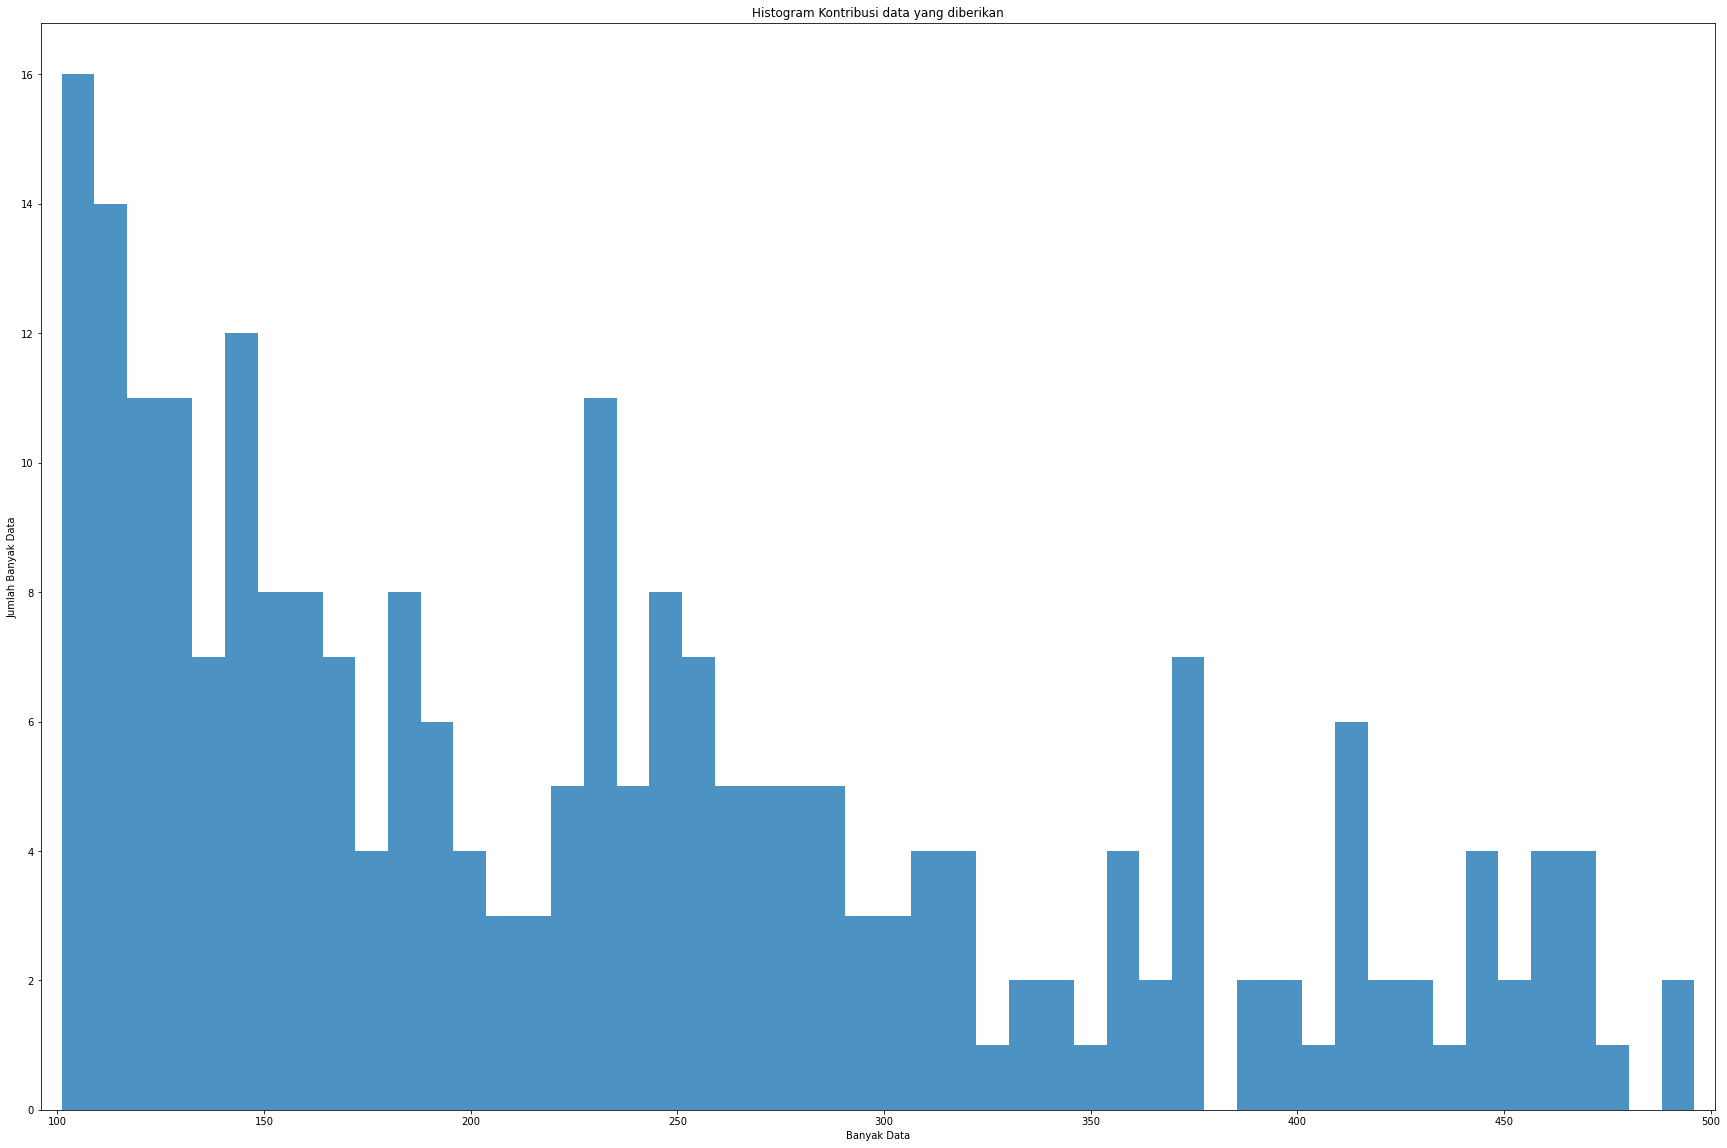

In [92]:
# Dari data diatas, kemudian dibuat menjadi Hystogram
data = listCountMovieRendahFinal

# fixed bin size
fig, ax = plt.subplots(figsize=(30,20))

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=50, alpha=0.8)
plt.title('Histogram Kontribusi data yang diberikan')
plt.xlabel('Banyak Data')
plt.ylabel('Jumlah Banyak Data')

plt.show()

In [95]:
# Meannya 235
print(sum(listCountMovieRendahFinal) / len(listCountMovieRendahFinal))

# Standar Deviasi turun dari 3352 menjadi 109
print(statistics.stdev(listCountMovieRendahFinal))

# STDV dan hystogram menunjukan data sudah tersebar degan cukup baik. Nilai STDV juga sudah turun hampir 28 kali
# nilai mean yang didapat juga berkisar 235, artinya range data latih tidak terlalu sedikit atau terlalu banyak

235.21311475409837
109.02151631999556


In [102]:
listMoiveDF_Sedang_Final.shape

(309, 2)

In [103]:
listMoiveDF_Rendah_Final.shape

(244, 2)

In [104]:
listMoiveDF_Tinggi_Final.shape

(180, 2)

In [110]:
# Total terdapat 733 Movie , tapi apakah 733 Movie Id yang didapat tidak ada yang saling tumpang tindih ?
# Kita akan cek disini

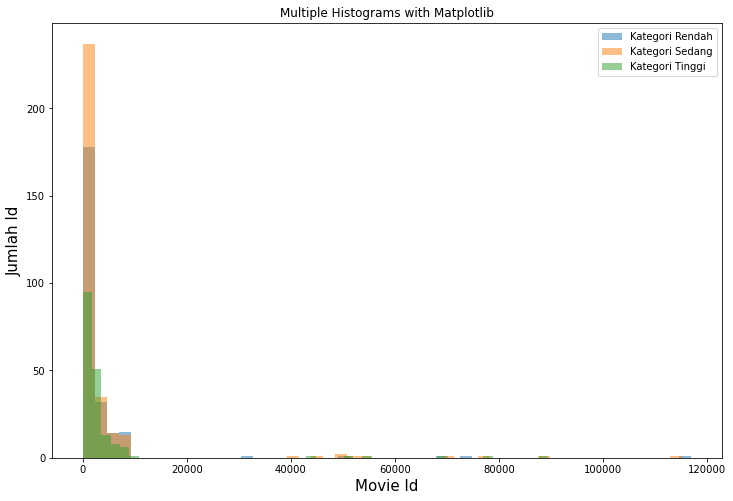

In [211]:
plt.figure(figsize=(12,8))
plt.hist(listMoiveDF_Rendah_Final['movie_id'], bins=50, alpha=0.5, label="Kategori Rendah")
plt.hist(listMoiveDF_Sedang_Final['movie_id'], bins=50, alpha=0.5, label="Kategori Sedang")
plt.hist(listMoiveDF_Tinggi_Final['movie_id'], bins=50, alpha=0.5, label="Kategori Tinggi")

plt.xlabel("Movie Id", size=15)
plt.ylabel("Jumlah Id", size=15)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')
plt.savefig("overlapping_histograms_with_matplotlib_Python.png")

In [ ]:
# Dari Hystogram tersebut, dapat diketahui diantara kelompok data, terdapat movie ID yang terletak diantara kelompok
# Hal ini perlu diperhatikan pada saat menyiapkan Data untuk Content Based

## Merge ke data RatingUser , supada dari data movie bisa dapat data Rating juga

### Kelompok sedang

In [212]:
# Dari data Movie ID yang sudah didapat, masih hanya terdapat 2 feature (movie Id, Counts)
# Maka dari itu, perlu dicari data lengkap supaya bisa Contend Based dan Collaborative Filtering serta Demografic Filtering
df3_CB_Raw_Sedang = df3_Filter_User_Sedang.merge(listMoiveDF_Sedang_Final,left_on='movie_id', right_on='movie_id')
df3_CL_Raw_Sedang = df3_CB_Raw_Sedang.copy()
df3_DF_Raw_Sedang = df3_CB_Raw_Sedang.copy()

In [213]:
df3_CB_Raw_Sedang.shape
# Setelah di merge, ternyata jadi 754429 data. Hal ini terjadi karena ada data movieId yang duplikasi
# MovieId bisa duplikasi karena ada userId yang memberikan rating lebih dari 1 kali.

(754429, 30)

In [215]:
# Bukti ada duplikasi movie karena di rate oleh banyak user
df3_CB_Raw_Sedang[df3_CB_Raw_Sedang['userId']==12].head(5)

,userId,counts_x,movieId,rating,timestamp,budget,genres,homepage,id,keywords,...,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,counts_y
0,12,52,157,1.0,943910494,18000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,157,[],...,Released,A dying planet. A fight for life.,Star Trek III: The Search for Spock,6.4,434,157,Star Trek III: The Search for Spock,"[{""cast_id"": 5, ""character"": ""Admiral James T....","[{""credit_id"": ""52fe4220c3a36847f8005eb3"", ""de...",1300
1300,12,52,1499,1.0,943910522,21000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,1499,"[{""id"": 233, ""name"": ""japan""}, {""id"": 4379, ""n...",...,Released,The Turtles Are Back....In Time.,Teenage Mutant Ninja Turtles III,5.1,184,1499,Teenage Mutant Ninja Turtles III,"[{""cast_id"": 5, ""character"": ""April O'Neil"", ""...","[{""credit_id"": ""53f989e1c3a36873580026c6"", ""de...",2761
4061,12,52,73,2.0,943910885,20000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.historyx.com/,73,"[{""id"": 279, ""name"": ""usa""}, {""id"": 376, ""name...",...,Released,Some Legacies Must End.,American History X,8.2,3016,73,American History X,"[{""cast_id"": 4, ""character"": ""Derek Vinyard"", ...","[{""credit_id"": ""5563a4c1925141271b0021e7"", ""de...",1430
5491,12,52,162,4.0,943911613,20000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...",NaN,162,"[{""id"": 240, ""name"": ""underdog""}, {""id"": 699, ...",...,Released,His scars run deep.,Edward Scissorhands,7.5,3601,162,Edward Scissorhands,"[{""cast_id"": 5, ""character"": ""Edward Scissorha...","[{""credit_id"": ""52fe4220c3a36847f80061e3"", ""de...",3243
8734,12,52,176,4.0,943912719,1200000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",NaN,176,"[{""id"": 1366, ""name"": ""shotgun""}, {""id"": 13000...",...,Released,Live or die. Make your choice.,Saw,7.2,2184,176,Saw,"[{""cast_id"": 4, ""character"": ""Dr. Lawrence Gor...","[{""credit_id"": ""52fe4223c3a36847f8006c57"", ""de...",1232


### Kategori Tinggi

In [223]:
# Dari data Movie ID yang sudah didapat, masih hanya terdapat 2 feature (movie Id, Counts)
# Maka dari itu, perlu dicari data lengkap supaya bisa Contend Based dan Collaborative Filtering serta Demografic Filtering
df3_CB_Raw_Tinggi= df3_Filter_User_Tinggi.merge(listMoiveDF_Tinggi_Final,left_on='movie_id', right_on='movie_id')
df3_CL_Raw_Tinggi = df3_CB_Raw_Tinggi.copy()
df3_DF_Raw_Tinggi = df3_CB_Raw_Tinggi.copy()

In [224]:
df3_CB_Raw_Tinggi.shape
# Setelah di merge, ternyata jadi 142879 data. Hal ini terjadi karena ada data movieId yang duplikasi
# MovieId bisa duplikasi karena ada userId yang memberikan rating lebih dari 1 kali.

(142879, 30)

In [234]:
# Bukti ada duplikasi movie karena di rate oleh banyak user
df3_CB_Raw_Tinggi[df3_CB_Raw_Tinggi['userId']==24].head(5)

,userId,counts_x,movieId,rating,timestamp,budget,genres,homepage,id,keywords,...,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,counts_y
0,24,114,73,3.0,979869845,20000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.historyx.com/,73,"[{""id"": 279, ""name"": ""usa""}, {""id"": 376, ""name...",...,Released,Some Legacies Must End.,American History X,8.2,3016,73,American History X,"[{""cast_id"": 4, ""character"": ""Derek Vinyard"", ...","[{""credit_id"": ""5563a4c1925141271b0021e7"", ""de...",705
705,24,114,176,3.0,979973260,1200000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",NaN,176,"[{""id"": 1366, ""name"": ""shotgun""}, {""id"": 13000...",...,Released,Live or die. Make your choice.,Saw,7.2,2184,176,Saw,"[{""cast_id"": 4, ""character"": ""Dr. Lawrence Gor...","[{""credit_id"": ""52fe4223c3a36847f8006c57"", ""de...",861
1566,24,114,322,4.0,979870663,25000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,322,"[{""id"": 516, ""name"": ""child abuse""}, {""id"": 73...",...,Released,"We bury our sins, we wash them clean.",Mystic River,7.6,1422,322,Mystic River,"[{""cast_id"": 4, ""character"": ""Jimmy Markum"", ""...","[{""credit_id"": ""52fe4237c3a36847f800d051"", ""de...",1193
2759,24,114,550,2.0,979871026,63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",...,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,550,Fight Club,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",1031
3790,24,114,714,5.0,979869961,110000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://www.mgm.com/view/movie/2029/Tomorrow-Ne...,714,"[{""id"": 212, ""name"": ""london england""}, {""id"":...",...,Released,Yesterday is a memory. Today is history. Tomor...,Tomorrow Never Dies,6.0,925,714,Tomorrow Never Dies,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""52fe426fc3a36847f801e40d"", ""de...",1185


### Kategori Rendah

In [228]:
# Dari data Movie ID yang sudah didapat, masih hanya terdapat 2 feature (movie Id, Counts)
# Maka dari itu, perlu dicari data lengkap supaya bisa Contend Based dan Collaborative Filtering serta Demografic Filtering
df3_CB_Raw_Rendah= df3_Filter_User_Rendah.merge(listMoiveDF_Rendah_Final,left_on='movie_id', right_on='movie_id')
df3_CL_Raw_Rendah = df3_CB_Raw_Rendah.copy()
df3_DF_Raw_Rendah = df3_CB_Raw_Rendah.copy()

In [229]:
df3_CB_Raw_Rendah.shape
# Setelah di merge, ternyata jadi 57392 data. Hal ini terjadi karena ada data movieId yang duplikasi
# MovieId bisa duplikasi karena ada userId yang memberikan rating lebih dari 1 kali.

(57392, 30)

In [232]:
# Bukti ada duplikasi movie karena di rate oleh banyak user
df3_CB_Raw_Rendah[df3_CB_Raw_Rendah['userId']==257438].head(5)

,userId,counts_x,movieId,rating,timestamp,budget,genres,homepage,id,keywords,...,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,counts_y
57388,257438,3,321,5.0,1183231059,4361898,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://mamboitaliano.ca/,321,"[{""id"": 237, ""name"": ""gay""}, {""id"": 494, ""name...",...,Released,Things change. Family doesn't.,Mambo Italiano,5.6,28,321,Mambo Italiano,"[{""cast_id"": 13, ""character"": ""Angelo Barberin...","[{""credit_id"": ""52fe4237c3a36847f800cf8f"", ""de...",161


## Mempersiapkan Data Content Based
Karena data diantara kategori saling sama, maka kesamaan / duplikasi diantara ketiganya perlu dihilangkan 

In [241]:
# Persiapkan Data Content Based
# Hapus duplikasi
df3_CB_P_Sedang = df3_CB_Raw_Sedang.copy()
df3_CB_P_Rendah = df3_CB_Raw_Rendah.copy()
df3_CB_P_Tinggi = df3_CB_Raw_Tinggi.copy()

df3_CB_All =  pd.concat([df3_CB_P_Rendah, df3_CB_P_Sedang, df3_CB_P_Tinggi])

df3_CB_All = df3_CB_All[['movieId','title_y','overview','genres','keywords','cast','crew']]

In [242]:
df3_CB_All.head(3)

,movieId,title_y,overview,genres,keywords,cast,crew
0,4474,My Super Ex-Girlfriend,When New York architect Matt Saunders dumps hi...,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...","[{""id"": 242, ""name"": ""new york""}, {""id"": 334, ...","[{""cast_id"": 3, ""character"": ""Jenny Johnson"", ...","[{""credit_id"": ""52fe43c4c3a36847f806e0c3"", ""de..."
1,4474,My Super Ex-Girlfriend,When New York architect Matt Saunders dumps hi...,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...","[{""id"": 242, ""name"": ""new york""}, {""id"": 334, ...","[{""cast_id"": 3, ""character"": ""Jenny Johnson"", ...","[{""credit_id"": ""52fe43c4c3a36847f806e0c3"", ""de..."
2,4474,My Super Ex-Girlfriend,When New York architect Matt Saunders dumps hi...,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...","[{""id"": 242, ""name"": ""new york""}, {""id"": 334, ...","[{""cast_id"": 3, ""character"": ""Jenny Johnson"", ...","[{""credit_id"": ""52fe43c4c3a36847f806e0c3"", ""de..."


In [243]:
df3_CB_All.shape

(954700, 7)

In [244]:
df3_CB_All_P=df3_CB_All.drop_duplicates()
df3_CB_All_P.shape
# Ternyata dari 733 Movie Id, setekah dihapus data duplikasi antar kelompok didapati 485 movieId

(485, 7)

In [245]:
df3_CB_All_P.head(5)

,movieId,title_y,overview,genres,keywords,cast,crew
0,4474,My Super Ex-Girlfriend,When New York architect Matt Saunders dumps hi...,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...","[{""id"": 242, ""name"": ""new york""}, {""id"": 334, ...","[{""cast_id"": 3, ""character"": ""Jenny Johnson"", ...","[{""credit_id"": ""52fe43c4c3a36847f806e0c3"", ""de..."
277,415,Batman & Robin,Along with crime-fighting partner Robin and ne...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 848, ""name"": ""double life""}, {""id"": 84...","[{""cast_id"": 4, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""59b66a169251417cbc011ec4"", ""de..."
459,157,Star Trek III: The Search for Spock,Admiral Kirk and his bridge crew risk their ca...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",[],"[{""cast_id"": 5, ""character"": ""Admiral James T....","[{""credit_id"": ""52fe4220c3a36847f8005eb3"", ""de..."
781,2163,Breakdown,When his SUV breaks down on a remote Southwest...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...","[{""id"": 387, ""name"": ""california""}, {""id"": 974...","[{""cast_id"": 15, ""character"": ""Jeffrey \"" Jeff...","[{""credit_id"": ""52fe433cc3a36847f8044b9d"", ""de..."
1028,2022,Mr. Deeds,"When Longfellow Deeds, a small-town pizzeria o...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...","[{""id"": 3452, ""name"": ""love letter""}, {""id"": 6...","[{""cast_id"": 1, ""character"": ""Longfellow Deeds...","[{""credit_id"": ""52fe432dc3a36847f8040377"", ""de..."


## Persiapa Data Collaborative Filtering

#### Kategori Sedang

In [246]:
# Persiapkan data Collaborative Filtering
df3_CF_P_Sedang = df3_CL_Raw_Sedang.copy()
df3_CF_P_Sedang = df3_CF_P_Sedang[['userId','movieId','rating']]
df3_CF_P_Sedang.shape

(754429, 3)

### Kategori Rendah

In [247]:
# Persiapkan data Collaborative Filtering
df3_CF_P_Rendah = df3_CL_Raw_Rendah.copy()
df3_CF_P_Rendah = df3_CL_Raw_Rendah[['userId','movieId','rating']]
df3_CF_P_Rendah.shape

(57392, 3)

### Kategori Tinggi

In [248]:
# Persiapkan data Collaborative Filtering
df3_CF_P_Tinggi = df3_CL_Raw_Tinggi.copy()
df3_CF_P_Tinggi = df3_CF_P_Tinggi[['userId','movieId','rating']]
df3_CF_P_Tinggi.shape

(142879, 3)

## Persiapankan Data Demografik Filtering

In [272]:
# Persiapkan data Demografik Filtering
df3_DF_P_Sedang = df3_DF_Raw_Sedang.copy()
df3_DF_P_Rendah = df3_DF_Raw_Rendah.copy()
df3_DF_P_Tinggi = df3_DF_Raw_Tinggi.copy()

df3_DF_All =  pd.concat([df3_DF_P_Rendah, df3_DF_P_Sedang, df3_DF_P_Tinggi])

df3_DF_All = df3_DF_All[['movieId','title_y','vote_count','vote_average']]
df3_DF_All.shape

(954700, 4)

In [273]:
df3_DF_All_P=df3_DF_All.drop_duplicates()
df3_DF_All_P.shape
# Ternyata dari 733 Movie Id, setekah dihapus data duplikasi antar kelompok didapati 485 movieId

(485, 4)

In [274]:
df3_DF_All_P.head(5)

,movieId,title_y,vote_count,vote_average
0,4474,My Super Ex-Girlfriend,442,4.8
277,415,Batman & Robin,1418,4.2
459,157,Star Trek III: The Search for Spock,434,6.4
781,2163,Breakdown,198,6.6
1028,2022,Mr. Deeds,644,5.6


# Proses Demografik Filtering

In [279]:
# Preprosesing data, dimana movie yang terlalu sedikit data vote, akan dibuang
# Movie yang votenya dibawah 308 akan dibuang
m= df3_DF_All_P['vote_count'].quantile(0.3)
q_movies = df3_DF_All_P.copy().loc[df3_DF_All_P['vote_count'] >= m]
q_movies.shape

(339, 4)

In [280]:
m

307.2

In [281]:
# Kita cari rata" karena dibutuhkan dirumus IMDB nya
C= df3_DF_All_P['vote_average'].mean()
C

6.633814432989691

In [282]:
# Rumus dari IMDB
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [283]:
# Tambahkan Kolom Score yang nilainya didapat dari rumusnya
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [284]:
# Dari Score yang didapat, di sorting
q_movies = q_movies.sort_values('score', ascending=False)

# tampilkan top 10
q_movies[['title_y', 'vote_count', 'vote_average', 'score']].head(10)

,title_y,vote_count,vote_average,score
35216,The Godfather,5893,8.4,8.312491
42040,Fight Club,9413,8.3,8.247341
19489,Pulp Fiction,8428,8.3,8.241403
55613,The Dark Knight,12002,8.2,8.160913
33323,Forrest Gump,7927,8.2,8.141569
4061,American History X,3016,8.2,8.055220
30421,The Lord of the Rings: The Return of the King,8064,8.1,8.046195
43118,The Silence of the Lambs,4443,8.1,8.005180
752203,The Shining,3757,8.1,7.989176
561951,Dead Poets Society,2705,8.1,7.950471


In [131]:
# # Kalau mau export data_CF.csv
# df3_CB_P.to_csv('data_CF.csv')

# Persiapan Untuk Data Colaborative Filtering

## Kategori Rendah

In [286]:
# Persiapan data Collaborative Filtering untuk training
dataRendah = Dataset.load_from_df(df3_CF_P_Rendah[['userId', 'movieId', 'rating']], reader)

In [296]:
# Gunakan SVD untuk Collaborative Filtering
svdRendah = SVD()
evaluate(svdRendah, dataRendah, measures=['RMSE', 'MAE'],cv=5)

# Hasil evaluasinya kurang baik, dimana nilai RMSE masih diangka 1. Nilai RMSE yang tinggi dicurigai
# karena record per user dalam memberi rating ke movie dinilai cukup sedikit dan kurang saling berkaitan
# Misal ada 10 user yang masing-masing memberikan 3 rate ke 3 movie saling berbeda. 
# Artinya diantara 10 user, tidak ada satupun yang serupa / mirip, karena user memberi rate ke movie yg saling berbeda

{'test_rmse': array([1.06401481, 1.06232122, 1.05357924, 1.05390832, 1.04314873]),
 'test_mae': array([0.84221103, 0.83854589, 0.83274456, 0.83061753, 0.82489768]),
 'fit_time': (1.6604382991790771,
  1.6534533500671387,
  1.6941356658935547,
  1.740797758102417,
  1.7050259113311768),
 'test_time': (0.04687809944152832,
  0.04691576957702637,
  0.031244277954101562,
  0.10793113708496094,
  0.04329633712768555)}

In [301]:
trainsetRendah = dataRendah.build_full_trainset()
svdRendah=svdRendah.fit(trainsetRendah)

## Kategori Sedang

In [303]:
# Persiapan data Collaborative Filtering untuk training
dataSedang = Dataset.load_from_df(df3_CF_P_Sedang[['userId', 'movieId', 'rating']], reader)

In [305]:
df3_CF_P_Sedang.shape

(754429, 3)

In [306]:
# Gunakan SVD untuk Collaborative Filtering
svdSedang = SVD()
evaluate(svdSedang, dataSedang, measures=['RMSE', 'MAE'],cv=7)

# Hasil evaluasinya cukup baik baik, dimana nilai RMSE dibawah  1

{'test_rmse': array([0.89653499, 0.89738173, 0.89662273, 0.89621904, 0.89761392,
        0.89456065, 0.89504508]),
 'test_mae': array([0.69410285, 0.6940301 , 0.69436635, 0.69391884, 0.6956631 ,
        0.69289017, 0.69395694]),
 'fit_time': (24.971388578414917,
  25.148430347442627,
  25.03571367263794,
  25.11095881462097,
  24.94906520843506,
  25.07697582244873,
  24.962989568710327),
 'test_time': (0.6093111038208008,
  0.7499196529388428,
  0.680560827255249,
  0.6092841625213623,
  0.7342991828918457,
  0.609299898147583,
  0.5936863422393799)}

In [307]:
trainsetSedang = dataSedang.build_full_trainset()
svdSedang=svdSedang.fit(trainsetSedang)



## Kategori Tinggi

In [309]:
# Persiapan data Collaborative Filtering untuk training
dataTinggi = Dataset.load_from_df(df3_CF_P_Tinggi[['userId', 'movieId', 'rating']], reader)

In [308]:
df3_CF_P_Tinggi.shape

(142879, 3)

In [310]:
# Gunakan SVD untuk Collaborative Filtering
svdTinggi = SVD()
evaluate(svdTinggi, dataTinggi, measures=['RMSE', 'MAE'],cv=7)

# Hasil evaluasinya cukup baik baik, dimana nilai RMSE dibawah  1

{'test_rmse': array([0.83814322, 0.85506873, 0.86108489, 0.84520821, 0.84928727,
        0.85028353, 0.8475283 ]),
 'test_mae': array([0.65270266, 0.66598362, 0.67180844, 0.65956925, 0.66295917,
        0.66195492, 0.65872598]),
 'fit_time': (4.621330738067627,
  4.593247175216675,
  4.608871698379517,
  4.6557018756866455,
  4.609524726867676,
  4.618575811386108,
  4.624450206756592),
 'test_time': (0.07811379432678223,
  0.07811427116394043,
  0.07811665534973145,
  0.21872806549072266,
  0.07812285423278809,
  0.07810544967651367,
  0.21872782707214355)}

In [311]:
trainsetTinggi = dataTinggi.build_full_trainset()
svdTinggi=svdTinggi.fit(trainsetTinggi)

In [ ]:
# Pada CF, terdapat 3 model yang berdiri sendiri-sendiri untuk tiap kategori

# Membuat Content Based

In [312]:
# Content Based nya
# Pakai TF-IDF Vectorizer Object. Buang semua stopword 'the', 'a' karena kurang terkait konteks
tfidf = TfidfVectorizer(stop_words='english')

# sebelum pembobotan, pastikan overview NaN diubah jadi '', karena akan error kalau NaN dibiarin
df3_CB_All_P['overview'] = df3_CB_All_P['overview'].fillna('')

# TF-IDF kan overview yang sudah dibetulkan overviewnya
tfidf_matrix = tfidf.fit_transform(df3_CB_All_P['overview'])

# shape of tfidf_matrix (Jumlah data dan jumlah Feature)
tfidf_matrix.shape


C:\Users\Lukas_K\anaconda3\envs\gpu_py_3_7\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(485, 5695)

In [313]:
# Idenya adalah membandingkan nilai diantara tfidf.

# Import linear_kernel dari sklearn
from sklearn.metrics.pairwise import linear_kernel

# Hasil nilai cosine similarity matrix (kesamaan diantara hasil tfidf nya)
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [314]:
len(cosine_sim)

485

In [316]:
df3_CB_All_P.head(3)

,movieId,title_y,overview,genres,keywords,cast,crew
0,4474,My Super Ex-Girlfriend,When New York architect Matt Saunders dumps hi...,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...","[{""id"": 242, ""name"": ""new york""}, {""id"": 334, ...","[{""cast_id"": 3, ""character"": ""Jenny Johnson"", ...","[{""credit_id"": ""52fe43c4c3a36847f806e0c3"", ""de..."
277,415,Batman & Robin,Along with crime-fighting partner Robin and ne...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 848, ""name"": ""double life""}, {""id"": 84...","[{""cast_id"": 4, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""59b66a169251417cbc011ec4"", ""de..."
459,157,Star Trek III: The Search for Spock,Admiral Kirk and his bridge crew risk their ca...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",[],"[{""cast_id"": 5, ""character"": ""Admiral James T....","[{""credit_id"": ""52fe4220c3a36847f8005eb3"", ""de..."


In [318]:
# Inputan akan pakai judul
df3_CB_All_P.reset_index(inplace = True)
indices = pd.Series(df3_CB_All_P.index, index=df3_CB_All_P['title_y'])

In [901]:
# Fungsi untuk menjadikan judul sebagai inputan dan mengeluarkan output film yang mirip
def get_recommendations(title, cosine_sim=cosine_sim):

    # Dari Index yang dibuat sebelumnya, dipakai untuk mencari baris data film dengan memakai judul 
    # idx akan mendapatkan lokasi index cosine_sim dari film yang dicari
    idx = indices[title]
    
    # Cari nilai cosine_sim dengan film" lain
    sim_scores = list(enumerate(cosine_sim[idx]))

    # urutkan berdasarkan nilai cosine_sim
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # ambil 10 teratas
    sim_scores = sim_scores[1:11]

    # pada nilai sim_score terdapat 2 kolom : id dan score
    # Ambil ID nya untuk dipakai mencari nama judul nya dibaris selanjutnya
    movie_indices = [i[0] for i in sim_scores]
    
    # Dari daftar ID yang sudah didapat, gunakan "iloc" untuk mencari baris data dari ID
    # Ambil  title dan id nya untuk dikembalikan
    return df3_CB_All_P[['title_y','level_0','movieId']].iloc[movie_indices]

#     # Jika ingin melihat score 
#     return sim_scores

In [902]:
df3_CB_All_P.shape

(485, 9)

In [903]:
df3_CB_All_P[df3_CB_All_P['title_y']=='Terminator 2: Judgment Day']

,level_0,index,movieId,title_y,overview,genres,keywords,cast,crew
397,397,530271,280,Terminator 2: Judgment Day,Nearly 10 years have passed since Sarah Connor...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...","[{""id"": 679, ""name"": ""cyborg""}, {""id"": 1366, ""...","[{""cast_id"": 1, ""character"": ""The Terminator"",...","[{""credit_id"": ""56b23ee3c3a36845b7000470"", ""de..."


In [904]:
get_recommendations('Terminator Salvation')

,title_y,level_0,movieId
397,Terminator 2: Judgment Day,397,280
414,The Terminator,414,218
33,Dances with Wolves,33,581
50,The Fisher King,50,177
86,Akira,86,149
208,Training Day,208,2034
19,Adaptation.,19,2757
268,Sunshine,268,1272
352,The Time Machine,352,2135
172,Big,172,2280


# Membuat Hybrid Filtering

Pada Hybrid Filtering ini, akan terdapat 2 inputan, yaiut :
1. UserId yang ingin diberikan Rekomendasi
2. Judul Film yang disukai

Dari judul film yang disukai, akan dicari 10 film yang paling mirip dengan Content Based
Kemudian setelah mendapat 10 judul tersebut, akan disorting menggunakan kombinasi 
Demografik Filtering dan Colaborative Filtering

Dengan pembobotan :

 1. Demografik Filtering (2)
 2. Collaborative Filtering (3)

Dengan skala maksimal 5

Besar pembobotan tersebut diberikan, karena user bisa jadi ikut menonton suatu film karena kecenderungan trend yang ada. 
Tetapi, user tetap akan berpegang teguh terhadap film yang memang disukainya.

In [924]:
# hybrid Filtering akan menjalankan Content Based dahulu, baru kemudian di sorting menggunakan Collaborative 
def hybridFiltering(userId,title):
    dataFilm_CB = get_recommendations(title)
    
    listSVD_predict=[]
    
    dataFilm_CB_List = dataFilm_CB['movieId'].values.tolist()
    for movieId in dataFilm_CB_List:
        # Untuk menentukan pakai model SVD kelompok mana
        dataFrame = pd.DataFrame([[movieId]], columns =['movieId'], dtype = float) 
        SVD_Rendah = pd.merge(df3_CF_P_Rendah, dataFrame,  how='right', left_on=['movieId'], right_on = ['movieId'])
        SVD_Sedang = pd.merge(df3_CF_P_Sedang, dataFrame,  how='right', left_on=['movieId'], right_on = ['movieId'])
        SVD_Tinggi = pd.merge(df3_CF_P_Tinggi, dataFrame,  how='right', left_on=['movieId'], right_on = ['movieId'])
        
        if (SVD_Rendah.shape[0] > SVD_Sedang.shape[0]) and (SVD_Rendah.shape[0] > SVD_Tinggi.shape[0]):
#             print("Rendah")
            listSVD_predict.append([svdRendah.predict(userId, movieId).est,movieId,dataFilm_CB[dataFilm_CB['movieId']==movieId].title_y.values.tolist()])
        elif (SVD_Sedang.shape[0] > SVD_Rendah.shape[0]) and (SVD_Sedang.shape[0] > SVD_Tinggi.shape[0]):
#             print("Sedang")
            listSVD_predict.append([svdSedang.predict(userId, movieId).est,movieId,dataFilm_CB[dataFilm_CB['movieId']==movieId].title_y.values.tolist()])
        elif (SVD_Tinggi.shape[0] > SVD_Rendah.shape[0]) and (SVD_Tinggi.shape[0] > SVD_Sedang.shape[0]):
#             print("Tinggi")
            listSVD_predict.append([svdTinggi.predict(userId, movieId).est,movieId,dataFilm_CB[dataFilm_CB['movieId']==movieId].title_y.values.tolist()])
        else:
            # Area Else akan jalan jika banyak data di antara kelompok saling sama, atau tidak ada data disuatu kelompok / NaN   
#             print("Terserah")
            listSVD_predict.append([svdSedang.predict(userId, movieId).est,movieId,dataFilm_CB[dataFilm_CB['movieId']==movieId].title_y.values.tolist()])
    return sorted(listSVD_predict,key=lambda x: (x[0],x[1]),reverse=True)

In [925]:
get_recommendations('Krull')

,title_y,level_0,movieId
248,Alien,248,348
453,Escape from the Planet of the Apes,453,1687
127,Birthday Girl,127,2084
143,Mars Attacks!,143,75
437,Mission to Mars,437,2067
400,The Thing,400,1091
303,Cold Mountain,303,2289
46,Shrek 2,46,809
360,Predator 2,360,169
350,Kill Bill: Vol. 1,350,24


In [926]:
# Terlihat sudah ter sorting kembali dengan 3 model SVD 
arrayResult =np.array(hybridFiltering(176,'Krull'))[:,2]
for i in arrayResult:
    print(i[0])

Cold Mountain
Alien
Mission to Mars
Kill Bill: Vol. 1
Escape from the Planet of the Apes
Mars Attacks!
Birthday Girl
The Thing
Predator 2
Shrek 2


C:\Users\Lukas_K\anaconda3\envs\gpu_py_3_7\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [361]:
# Acuan User
test = df3[df3['userId']==176]
test[['title_y','rating']]

,title_y,rating
145323,Donnie Darko,3.0
171069,A Nightmare on Elm Street,4.0
285401,Monsoon Wedding,3.0
359725,Reservoir Dogs,3.0
398805,Rebecca,3.0
424892,Batman & Robin,3.0
521456,Terminator 3: Rise of the Machines,5.0
676950,"Monsters, Inc.",4.0
839733,The Terminal,5.0
919355,Lost in Translation,3.0


In [ ]:
# Terlihat proses rekomendasi sudah terjadi, Kill Bil yang sebelumnya no 10, naik jadi no 4 karena user suka SawIV yang 
# notabene adalah film sadis dan film The Nighmarare. 

# Sebetulnya masih ada beberapa faktor lain yang dipertanyakan. 
# (1) Kenapa Terminator Salvatin suka, tapi The Terminator tidak suka

# Permasalahan tersebut bisa dijawab, jika Content Based tidak hanya menggunakan Overview saja, tetapi genre,cast,crew dll

# Membuat Hybrid Filtering versi kombinasi 3 Filtering

In [998]:
# Fungsi untuk menjadikan judul sebagai inputan dan mengeluarkan output film yang mirip
def get_recommendations2(title, cosine_sim=cosine_sim2):
    
    
    # Dari Index yang dibuat sebelumnya, dipakai untuk mencari baris data film dengan memakai judul 
    # idx akan mendapatkan lokasi index cosine_sim dari film yang dicari
    idx = indices2[title]

    # Cari nilai cosine_sim dengan film" lain
    sim_scores = list(enumerate(cosine_sim[idx]))

    # urutkan berdasarkan nilai cosine_sim
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # ambil 10 teratas
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    
    # Dari daftar ID yang sudah didapat, gunakan "iloc" untuk mencari baris data dari ID
    # Ambil  title dan id nya untuk dikembalikan
#     return q2_movies[['title_y_x']].iloc[movie_indices]

#     # Jika ingin melihat score 
#     return sim_scores

    listValueSimilarity =[]
    for i in sim_scores:
        listValueSimilarity.append(i[1])
    
    return sum(listValueSimilarity)/len(listValueSimilarity)


In [999]:
get_recommendations2('It Happened One Night')

0.01653183250740576

In [1007]:
# hybrid Filtering akan menjalankan Content Based dahulu, baru kemudian di sorting menggunakan Collaborative 
def hybridFiltering2(userId,title):
    dataFilm_CB = get_recommendations(title)
    
    listSVD_predict=[]
    listDF = []
    
    #Cari data dari movie yang di dapat dari ContentBasednya
    dataInput = df3_CB_All_P[df3_CB_All_P['title_y']==title]

    # Merge dengan 10 top film dari Demografic Filtering
    q2_movies = q_movies.head(10).merge(df3_CB_All_P,left_on='movieId', right_on='movieId', how='left',copy=False)
    q2_movies = pd.concat([q2_movies,dataInput])

    # Ada Bug di kolom, sementara dibenarkan pakai ini
    q2_movies.loc[q2_movies['title_y'] == title, 'title_y_x'] = title
    q2_movies = q2_movies[['index','title_y_x','overview','movieId']]
    del q2_movies['index']
    q2_movies.reset_index(inplace = True)
    
    # Jika Overview kosong, maka diisikan ''
    q2_movies['q2_moviesoverview'] = q2_movies['overview'].fillna('')
    # Beri pembobotan ke Overviewnya
    tfidf_matrix2 = tfidf.fit_transform(q2_movies['overview'])
    tfidf_matrix2.shape

    # Komparasikan satu sama lain
    cosine_sim2 = linear_kernel(tfidf_matrix2, tfidf_matrix2)
    

    # Inputan akan pakai judul
    indices2 = pd.Series(q2_movies.index, index=q2_movies['title_y_x'])
    
    dataFilm_CB_List = dataFilm_CB['movieId'].values.tolist()
    for movieId in dataFilm_CB_List:
        # Untuk menentukan pakai model SVD kelompok mana
        dataFrame = pd.DataFrame([[movieId]], columns =['movieId'], dtype = int) 
        SVD_Rendah = pd.merge(df3_CF_P_Rendah, dataFrame,  how='right', left_on=['movieId'], right_on = ['movieId'])
        SVD_Sedang = pd.merge(df3_CF_P_Sedang, dataFrame,  how='right', left_on=['movieId'], right_on = ['movieId'])
        SVD_Tinggi = pd.merge(df3_CF_P_Tinggi, dataFrame,  how='right', left_on=['movieId'], right_on = ['movieId'])
        
        movieTitle = pd.merge(df3_CB_All_P, dataFrame,  how='right', left_on=['movieId'], right_on = ['movieId'])
        
        # Demografik Filtering 
        DF_calculation = get_recommendations2(movieTitle.title_y.to_string()[5:])*0.2
        
        listDF.append(DF_calculation)
        if (SVD_Rendah.shape[0] > SVD_Sedang.shape[0]) and (SVD_Rendah.shape[0] > SVD_Tinggi.shape[0]):
            # print("Rendah")
            CF_calculation = (svdRendah.predict(userId, movieId).est)*0.3
            
            listSVD_predict.append([
                    CF_calculation+DF_calculation,movieId
                ,[dataFilm_CB[dataFilm_CB['movieId']==movieId].title_y.values.tolist()]])
        elif (SVD_Sedang.shape[0] > SVD_Rendah.shape[0]) and (SVD_Sedang.shape[0] > SVD_Tinggi.shape[0]):
            # print("Sedang")
            CF_calculation = (svdSedang.predict(userId, movieId).est)*0.3
                
            listSVD_predict.append([
                    CF_calculation+DF_calculation,movieId
                ,[dataFilm_CB[dataFilm_CB['movieId']==movieId].title_y.values.tolist()]])
                
        elif (SVD_Tinggi.shape[0] > SVD_Rendah.shape[0]) and (SVD_Tinggi.shape[0] > SVD_Sedang.shape[0]):
            # print("Tinggi")
            CF_calculation = (svdTinggi.predict(userId, movieId).est)*0.3
                
            listSVD_predict.append([
                    CF_calculation+DF_calculation,movieId
                ,[dataFilm_CB[dataFilm_CB['movieId']==movieId].title_y.values.tolist()]])
        else:
            # Area Else akan jalan jika banyak data di antara kelompok saling sama, atau tidak ada data disuatu kelompok / NaN   
            # print("Terserah")
            CF_calculation = (svdTinggi.predict(userId, movieId).est)*0.3
            
            listSVD_predict.append([
                    CF_calculation+DF_calculation,movieId
                ,[dataFilm_CB[dataFilm_CB['movieId']==movieId].title_y.values.tolist()]])
    
    return listDF
    return sorted(listSVD_predict,key=lambda x: (x[0],x[1]),reverse=True)

In [1009]:
hybridFiltering2(176,'Krull')

[0.003306366501481152,
 0.003306366501481152,
 0.003306366501481152,
 0.003306366501481152,
 0.003306366501481152,
 0.003306366501481152,
 0.003306366501481152,
 0.003306366501481152,
 0.003306366501481152,
 0.003306366501481152]

In [1004]:
# Terlihat sudah ter sorting kembali dengan 3 Filtering
# hybridFiltering2(176,'Krull')
arrayResult =np.array(hybridFiltering2(176,'Krull'))[:,2]
for i in arrayResult:
    print(i[0][0])

Cold Mountain
Alien
Mission to Mars
Kill Bill: Vol. 1
Escape from the Planet of the Apes
Mars Attacks!
Birthday Girl
The Thing
Predator 2
Shrek 2


C:\Users\Lukas_K\anaconda3\envs\gpu_py_3_7\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [1005]:
# hybridFiltering1(176,'Krull')
arrayResult =np.array(hybridFiltering(176,'Krull'))[:,2]
for i in arrayResult:
    print(i[0])

Cold Mountain
Alien
Mission to Mars
Kill Bill: Vol. 1
Escape from the Planet of the Apes
Mars Attacks!
Birthday Girl
The Thing
Predator 2
Shrek 2


C:\Users\Lukas_K\anaconda3\envs\gpu_py_3_7\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
